## Описание проекта


Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Нужно  изучить:**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

**В распоряжении три датасета:**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.


- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.


- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**1.1 Предобрабтка датафрейма visits**

In [3]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
visits.duplicated().sum()

0

In [7]:
visits.columns = [col.lower() for col in visits.columns] # Приведём названия колонок к нижнему регистру, изменим название
visits.rename(columns={"user id":"user_id","session start":"session_start","session end":"session_end"},inplace=True)

In [8]:
visits["session_start"] = pd.to_datetime(visits["session_start"]) # Изменим тип данных у временных переменных
visits["session_end"] = pd.to_datetime(visits["session_end"])

In [9]:
visits["channel"].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [10]:
visits["channel"] = visits["channel"].str.title() # Названия каналов приведем к общему виду

**1.2 Предобрабтка датафрейма orders**

In [11]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [14]:
orders.duplicated().sum()

0

In [15]:
orders.columns = [i.lower() for i in orders.columns]
orders.rename(columns={"user id":"user_id","event dt":"event_dt"},inplace=True)

In [16]:
orders["event_dt"] = pd.to_datetime(orders["event_dt"])

**1.3 Предобрабтка датафрейма costs**

In [17]:
costs

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [20]:
costs.duplicated().sum()

0

In [21]:
costs.columns = [i.lower() for i in costs.columns]
orders.rename(columns={"user id":"user_id","event dt":"event_dt"},inplace=True)
costs["channel"] = costs["channel"].str.title()

In [22]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [23]:
costs.channel.unique()

array(['Faceboom', 'Mediatornado', 'Rocketsuperads', 'Tiptop', 'Yrabbit',
       'Adnonsense', 'Leapbob', 'Opplecreativemedia', 'Wahoonetbanner',
       'Lambdamediaads'], dtype=object)

**Вывод**: В работе используем три датафрейма с данными:

-visits. Информация о пользователе, стране пользователя,тип устройства, канал перехода, дата и время начала сессии

-orders. Информация о пользователе, дата и время покупки, сумма заказа

-costs. Дата проведения рекламной акции, рекламный источник, расходы на эту компанию

В ходе предобработки данных выяснилось, что данные пропусков и явных дубликатов не имеют. Названия столбцов приведены к нижнему регистру, названия приведены к корректному виду. Тип данных в колонке с временем изменён на тип - datetime64.ns. В ДФ visits.channel данные столбцы приведены к одному виду.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [24]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**функция для расчёта удержания**

In [25]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта конверсии**

In [26]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Вывод: выведены функции для расчёта финансовых показателей, удержания клиентов, конверсии 

- LTV — общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок.
- ROI - окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC, то есть на сколько процентов «окупились» клиенты. 
- CAC — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент.
- Retention rate - Насколько долго клиенты остаются в компании

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [27]:
def get_profiles(visits, orders, costs ):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())



    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [28]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    Faceboom     Mac  United States   
1   4919697 2019-07-09 12:46:07    Faceboom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     Organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  Adnonsense      PC        Germany   
4  31989216 2019-10-02 00:07:44     Yrabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [29]:
# Согласно кейса, момент проведения анализа - 01.11.2019
# бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 
# Поэтому зададим горизонт анализа 14 дней.

observation_date = datetime(2019,11,1).date() # Момент анализа
horizon_days = 14  # горизонт анализа 

In [30]:
# минимальная и максимальная дата привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print(min_analysis_date)
print(max_analysis_date)

2019-05-01
2019-10-27


**Вывод**: Имеем данные о пользователях привлечнных с 1 мая по 27 октября 2019 года. Для анализа финансовых показателей задали двух недельный горизонт анализа данных. Момент анализа данных - 01.11.2019

**3.1 Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователе**

In [31]:
profiles_region = profiles.groupby(['region'])\
    .agg({"user_id":"count","payer":["sum","mean"]})
profiles_region.columns = ["users","payers","ratio, %"]   
profiles_region.sort_values(by="ratio, %",ascending=False).style.format({'ratio, %': '{:.2%}'})

**Вывод**: Наиболее платежеспособными пользователями считаются пользователи из США. Также стоит обратить внимание, что общее число пользователей из США в два раза больше, чем суммарное количество остальных пользователей. А также конверсия для пользователей из США является больше, 6 % платящих пользователей (Число платящих пользователей к общему числу пользователей)

**3.2 Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.**

In [32]:
profiles_device = profiles.groupby(['device'])\
    .agg({"user_id":"count","payer":["sum","mean"]})
profiles_device
profiles_device.columns = ["users","payers","ratio, %"]   
profiles_device.sort_values(by="ratio, %",ascending=False).style.format({'ratio, %': '{:.2%}'})

**Вывод**: Большинство пользователей пользуются приложением на MAC и на смартфоне - iphone c операционной системой IOS. Впринципе, для всех пользователей в зависимости от девайса, конверсия примерно около 5-6%

**3.3 Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.**

In [33]:
profiles_channel = profiles.groupby(['channel'])\
    .agg({"user_id":"count","payer":["sum","mean"]})
profiles_channel
profiles_channel.columns = ["users","payers","ratio, %"]   
profiles_channel.sort_values(by="ratio, %",ascending=False).style.format({'ratio, %': '{:.2%}'})

In [34]:
# Добавил зависимость от региона, в каких странах представлены рекламные каналы
profiles_channels = profiles.pivot_table( 
    index=["channel","region"],columns="payer",values="user_id",aggfunc={"user_id":"nunique"})\
    .reset_index()\
    .assign(ratio=lambda x: x[True]/x.sum(axis=1))\
    .sort_values(by=["region","ratio"], ascending=False)
profiles_channels.style.format({'ratio': '{:.2%}'})

**Вывод**: Наибольшее число платящих пользователей пришли с канала - "Faceboom". Конверсия в 12%! 
Стоит обратить внимание на канал - "Organic". Это пользователи, которые привлечены не через рекламные каналы. Огромное число пользователей пришедших с этого канала не платят за приложение. Возможно, это хорошая точка роста или одна из проблем скрывающая в этом пункте.

**Вывод**

Ознакомившись с данными, можем подытожить что работаем с данными компании запустившего развлекательное приложение Procrastinate Pro+. Данные собраны от пользователей, которые пребывают на территориях стран: США, Великобритания, Франция и Германия. Наиболее платежеспособными пользователями считаются пользователи из США. Также стоит обратить внимание, что общее число пользователей из США в два раза больше, чем суммарное количество остальных пользователей. А также конверсия для пользователей из США является больше, 6 % платящих пользователей (Число платящих пользователей к общему числу пользователей).

Большинство пользователей пользуются приложением на MAC и на смартфоне - iphone c операционной системой IOS. Впринципе, для всех пользователей в зависимости от девайса, конверсия примерно около 5-6%

Наибольшее число платящих пользователей пришли с канала - "Faceboom". Конверсия в 12%! Стоит обратить внимание на канал - "Organic". Это пользователи, которые привлечены не через рекламные каналы. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [35]:
сosts_total = costs["costs"].sum() # Общая сумма расходов на рекламу
round(сosts_total,0)

105497.0

In [36]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    Faceboom     Mac  United States   
1   4919697 2019-07-09 12:46:07    Faceboom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     Organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  Adnonsense      PC        Germany   
4  31989216 2019-10-02 00:07:44     Yrabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [37]:
costs_gr = costs.groupby("channel").agg({"costs":"sum"}).sort_values(by="costs", ascending=False)
costs_gr["ratio"] = costs_gr["costs"] / сosts_total
costs_gr.reset_index().style.format({'ratio': '{:.2%}'})

# Распределение затрат на каждый источник

In [38]:
# Получим данные стоимости привлечения одного пользователя в зависимости от канала
profiles.groupby("channel").agg({"acquisition_cost":"mean"})\
.sort_values(by="acquisition_cost", ascending = False).style.format({'ratio, %': '{:.2%}'})

**Вывод**:  Рекламный бюджет за период для приложения Procrastinate Pro+ составил 105497.0 У.Е. Львиная доля бюджета потрачена для привлечения пользователей из рекламного источника - Tiptop. Следом идёт Faceboom c затратами в 30% от общего бюджета. 

Наиболее неэффективно выглядит продвижение рекламы через источник Tiptop. За данный период компания вложила 50% своего рекламного бюджета, для получения конверсии 9,6%, САС на одного пользователя составил в среднем 2.79 У.Е. на Faceboom в свою очередь – 1.11 У.Е. Стоит разобраться, почему при увеличивании финансирования количество платящих пользователей не росло пропорционально.

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [39]:
costs["month"] = pd.to_datetime(costs["dt"]).dt.month # Получаем данные по номеру месяцу
costs["week"] = pd.to_datetime(costs["dt"]).dt.isocalendar().week # Получаем данные по номеру неделт

In [40]:
costs

dt         channel  costs  month  week
0     2019-05-01        Faceboom  113.3      5    18
1     2019-05-02        Faceboom   78.1      5    18
2     2019-05-03        Faceboom   85.8      5    18
3     2019-05-04        Faceboom  136.4      5    18
4     2019-05-05        Faceboom  122.1      5    18
...          ...             ...    ...    ...   ...
1795  2019-10-23  Lambdamediaads    4.0     10    43
1796  2019-10-24  Lambdamediaads    6.4     10    43
1797  2019-10-25  Lambdamediaads    8.8     10    43
1798  2019-10-26  Lambdamediaads    8.8     10    43
1799  2019-10-27  Lambdamediaads   12.0     10    43

[1800 rows x 5 columns]

In [41]:
costs_month = costs.pivot_table(index="month",columns="channel",values="costs",aggfunc={"costs":"sum"})
costs_week = costs.pivot_table(index="week",columns="channel",values="costs",aggfunc={"costs":"sum"})

Постороим графики отражающие траты в зависимости от номера месяца и недели

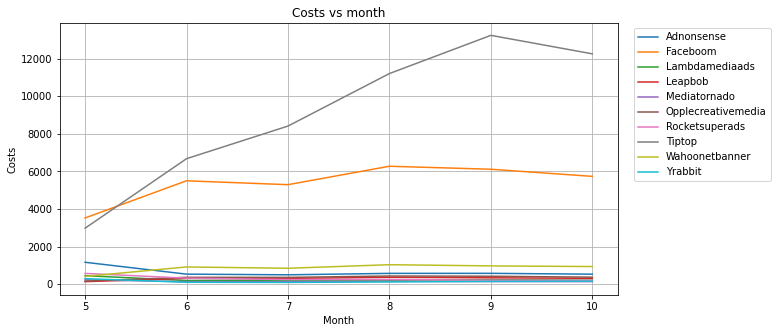

In [42]:

costs_month.plot(figsize=(10, 5), grid=True)
plt.title('Costs vs month')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()


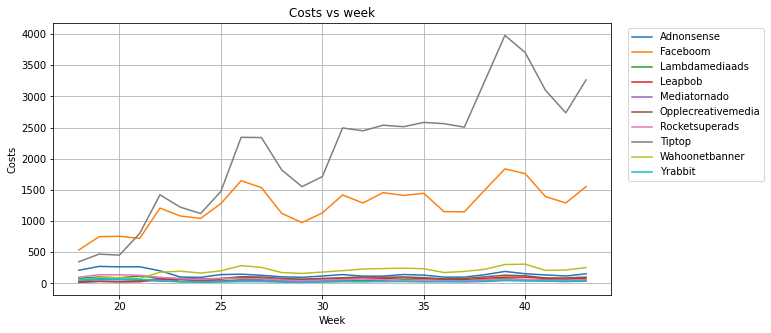

In [43]:
costs_week.plot(figsize=(10, 5), grid=True)
plt.title('Costs vs week')
plt.xlabel('Week')
plt.ylabel('Costs')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

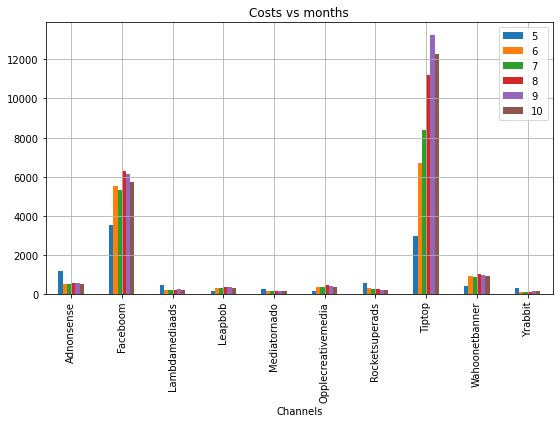

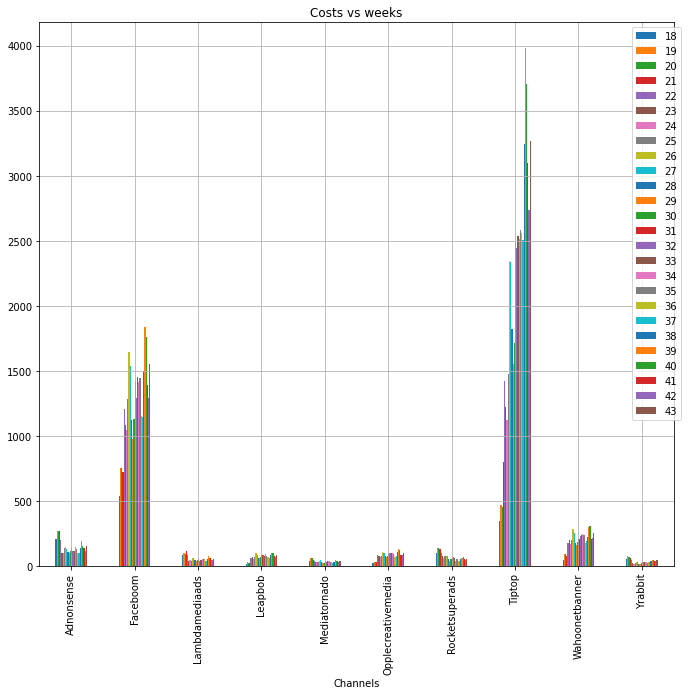

In [44]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 2, 1)
costs_month.T.plot.bar(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Channels')
plt.title('Costs vs months')
plt.show()


plt.figure(figsize=(25, 10))


ax2 = plt.subplot(1, 2, 2)
costs_week.T.plot.bar(grid=True, ax=ax2)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.xlabel('Channels')
plt.title('Costs vs weeks')
plt.show()


Можно посмотреть детально, зависимость затрат от канала привлечения для остальных каналов. Для этого уберем двух гигантов.

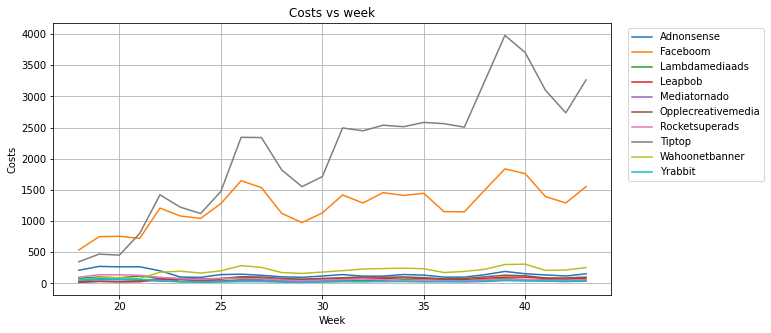

In [45]:
costs_week.plot(figsize=(10, 5), grid=True)
plt.title('Costs vs week')
plt.xlabel('Week')
plt.ylabel('Costs')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

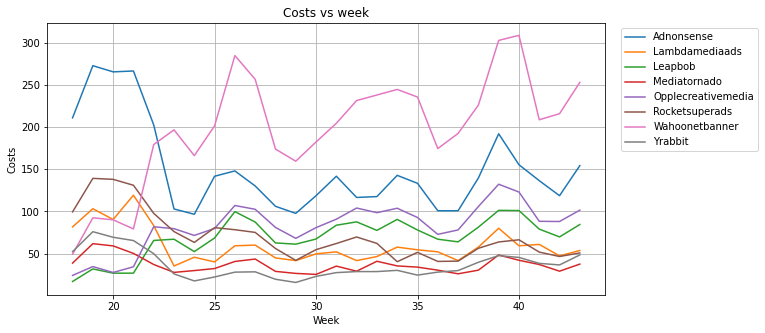

In [46]:
costs.query('channel != "Faceboom" & channel != "Tiptop"')\
    .pivot_table(index="week",columns="channel",values="costs",aggfunc={"costs":"sum"})\
    .plot(figsize=(10, 5), grid=True)
plt.title('Costs vs week')
plt.xlabel('Week')
plt.ylabel('Costs')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

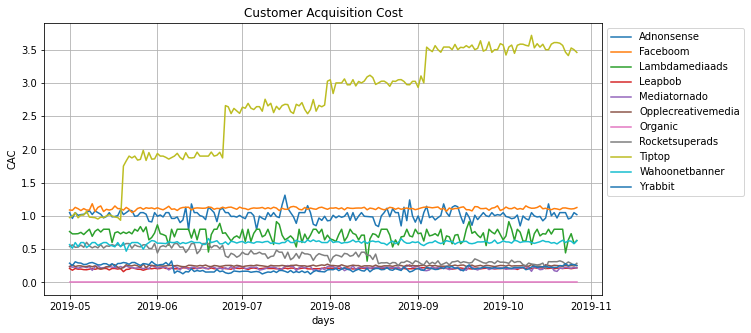

In [47]:
profiles.pivot_table(index="dt",columns="channel",values="acquisition_cost",aggfunc="mean")\
.plot(figsize=(10, 5), grid=True)
plt.title('Customer Acquisition Cost')
plt.xlabel('days')
plt.ylabel('CAC')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

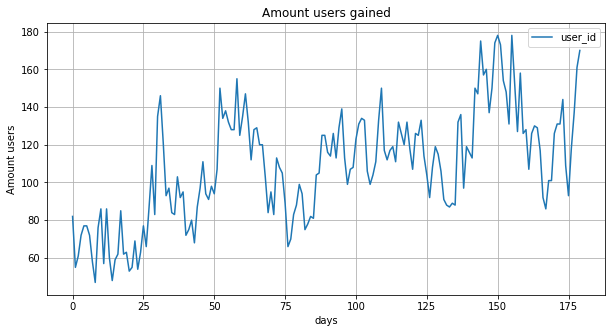

In [48]:
profiles.query('channel=="Tiptop"').pivot_table(index="dt",values="user_id",aggfunc="nunique").reset_index()\
.plot(figsize=(10, 5), grid=True)
plt.title('Amount users gained')
plt.xlabel('days')
plt.ylabel('Amount users')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()


**Вывод:**

Рекламный бюджет за период для приложения Procrastinate Pro+ составил 105497.0 У.Е. Львиная доля бюджета потрачена для привлечения пользователей из рекламного источника - Tiptop. Следом идёт Faceboom c затратами в 30% от общего бюджета.

Построив графики затрат на рекламу в зависимости от месяца и более детально от номера недели, видим явных фаворитов по затратам по каналам привлечения. График зависимости для канала Tiptop & faceboom между собой сильно коррелирует, но с 25 недели затраты для канала Tiptop начинают расти более явно. К 40 неделе затраты на Tiptop вдвое превышают затраты для канала привлечения - faceboom. Возможно, это связано с изменением ценовой политики для размещения рекламы на этом канале.

Также, построили график для остальных каналов исключив два самых затратных. Очень интересен канал - Adnonsense. Затраты с 20 по 23 неделю снизились практически вдвое до, хотя мы учитываем, что привлечение через этот канал является вторым по конверсии платящих пользователей.

Построив график стоимости средней стоимости привлечения одного пользователя в зависимости от канала привлечения. Здесь явно видна аномалия для канала привлечения - Tiptop. Ежемесячно происходит повышения стоимости привлечения пользователя, причём не наблюдается устойчивый рост привлечения пользователей, тренд пилообразный, что говорит за то, что растет стоимость привлечения публикации рекламы. Стоимость привлечения одного пользователя для faceboom & Adnonsense схожи по стоимости около 1 У.Е.


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**5.1 Расчёт экономических параметров для всех каналов привлечения.**

In [49]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [50]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 
# функция для визуализации LTV и ROI

In [51]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)
    
    plt.tight_layout()
    plt.show()

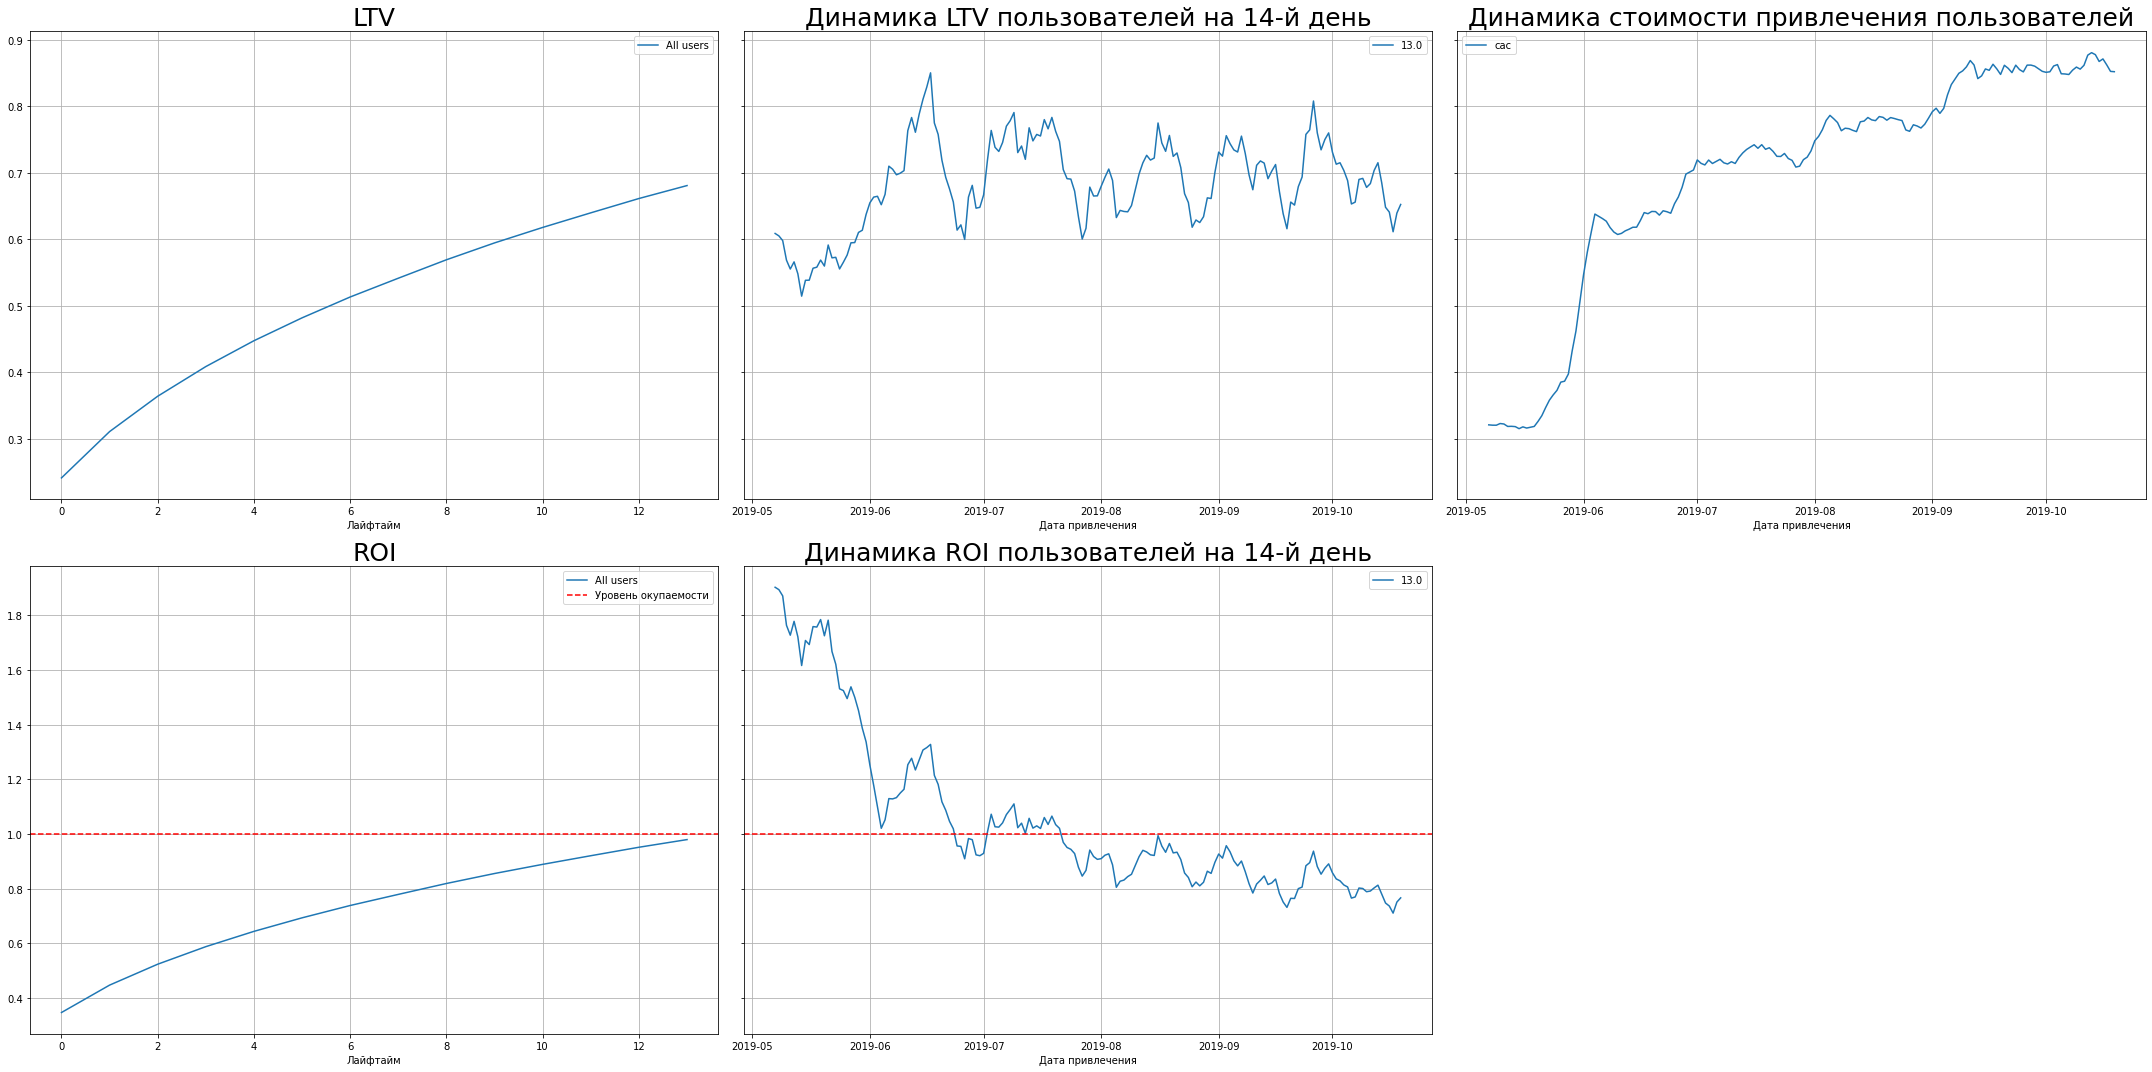

In [52]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод**

Глядя на кривые видим:
- LTV - общая выручка на текущий день / размер когорты.  Наблюдается стабильный рост, качество платящих пользователей не падает. 
- САС - стоимость привлечения одного пользователя растёт с каждым месяцем. 
- ROI - отношение LTV к CAC на 14 день приближается к окупаемости. Получается, что LTV растёт быстрее, чем CAC.

Но здесь примем во внимание, что мы производим расчёт для всех каналов привлечения. Помним, что для канала - 'Organic', компания не затрачивает средства для привлечения клиентов. На мой взгляд стоит исключить этот канал для расчёта, чтобы точнее взглянуть на ситуацию.

**5.2 Расчёт экономических параметров для всех каналов привлечения за исключением - "Organic".**

In [53]:
profiles.channel.value_counts()

Organic               56439
Faceboom              29144
Tiptop                19561
Opplecreativemedia     8605
Leapbob                8553
Wahoonetbanner         8553
Rocketsuperads         4448
Mediatornado           4364
Yrabbit                4312
Adnonsense             3880
Lambdamediaads         2149
Name: channel, dtype: int64

In [54]:
profiles = profiles.query('channel != "Organic"')

In [55]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [56]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 
# функция для визуализации LTV и ROI

In [57]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)
    
    plt.tight_layout()
    plt.show()

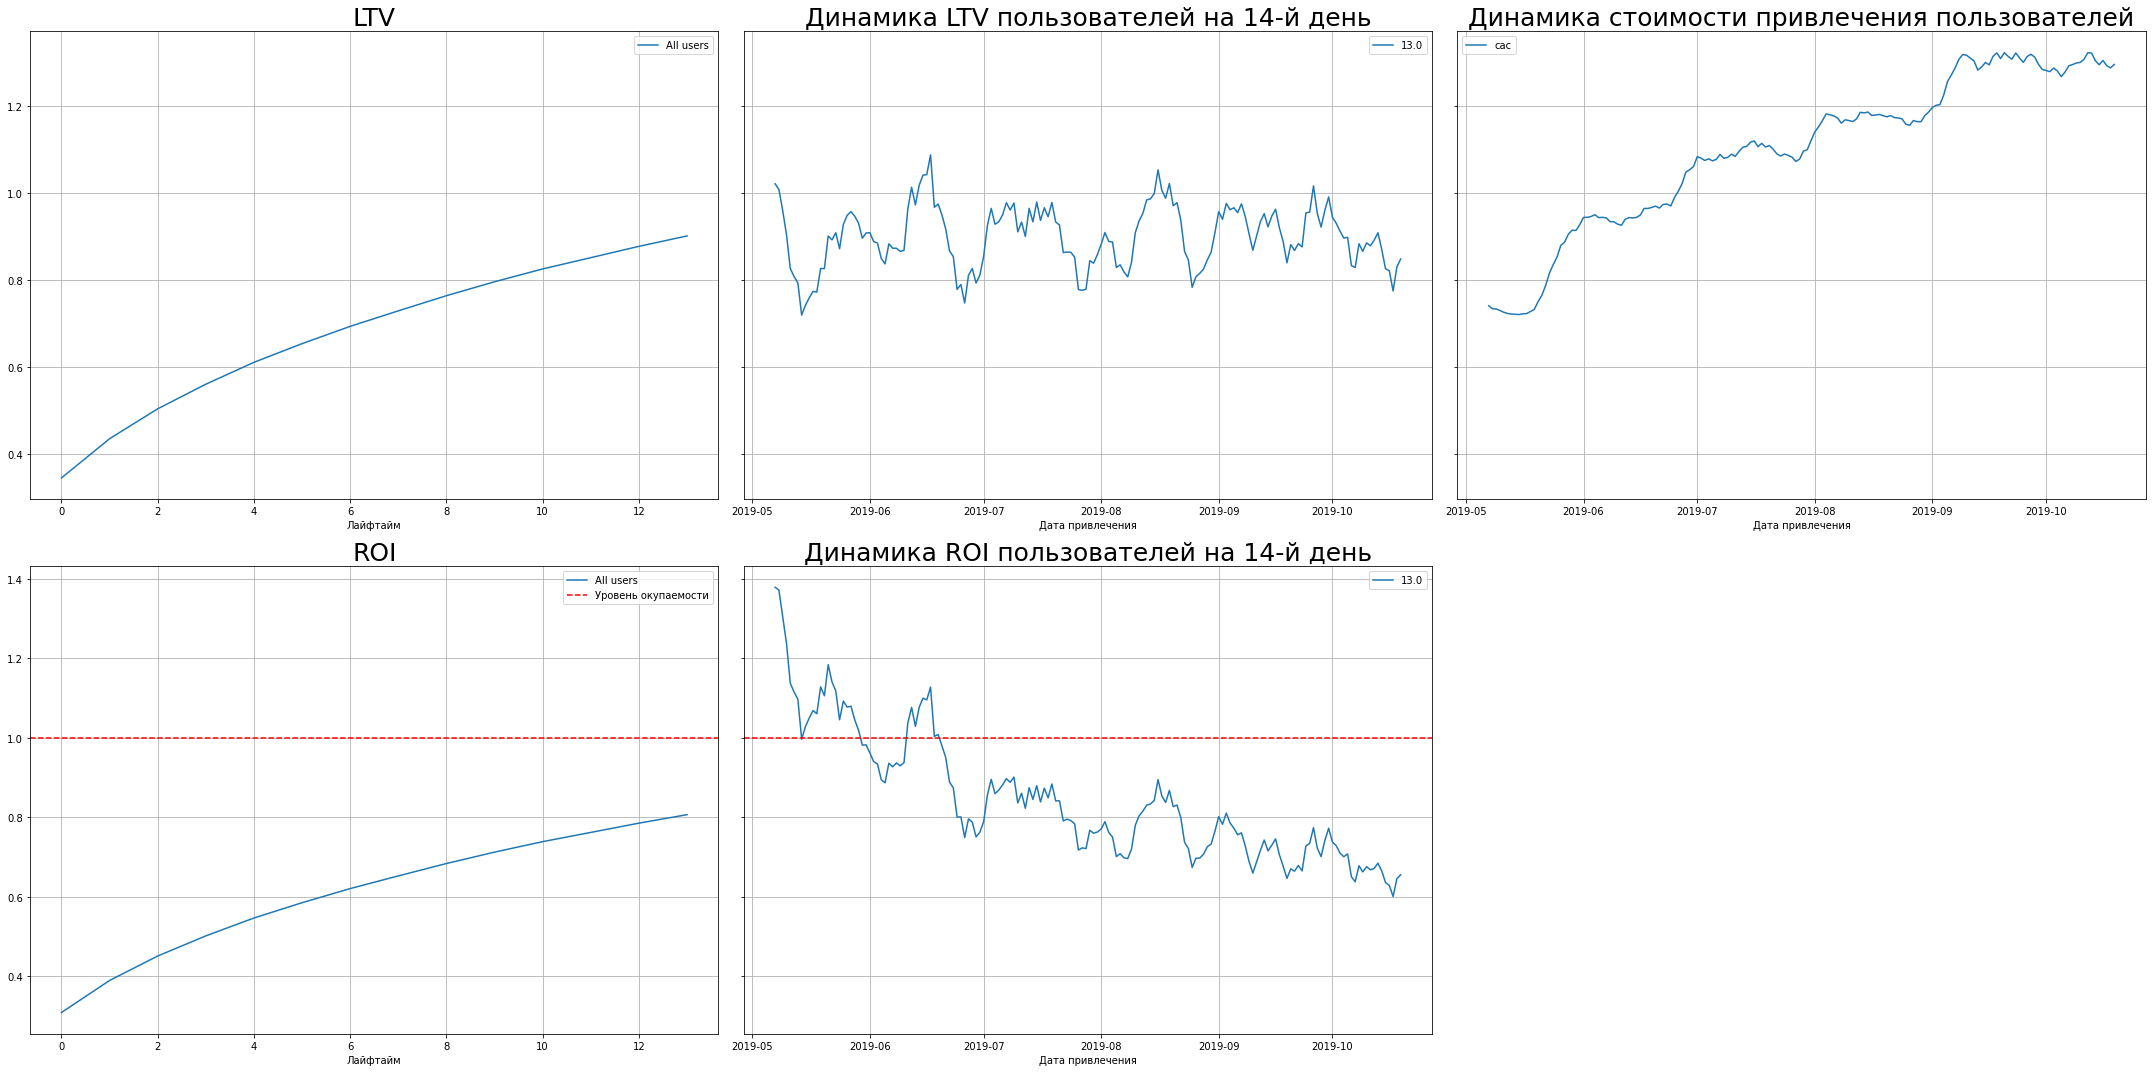

In [58]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**

Глядя на кривые видим:
- LTV - общая выручка на текущий день / размер когорты.  Наблюдается стабильный рост, качество платящих пользователей не падает. 
- САС - стоимость привлечения одного пользователя растёт с каждым месяцем. 
- ROI - отношение LTV к CAC на 14 день уже не приближается к окупаемости, то есть ROI не окупается. На 14 день значение составляет около 80 процентов.



**5.3 Проверяем конверсию пользователей и динамику её изменения, проверяем удержаниее пользователей.**

In [59]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [60]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

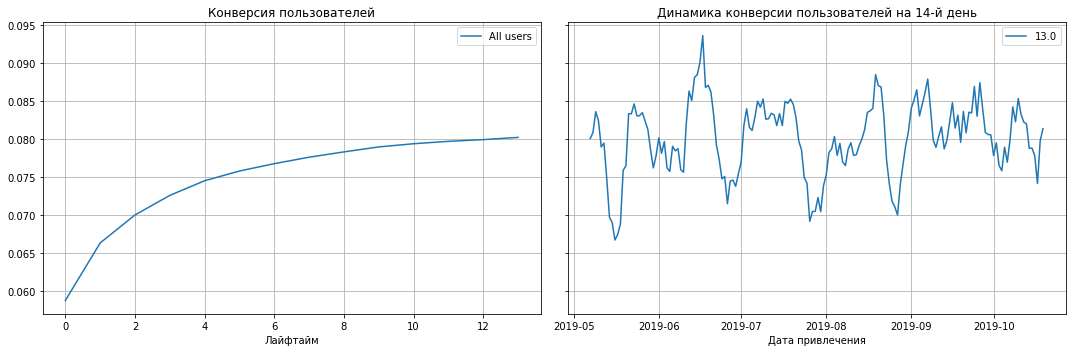

In [61]:
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**

Конверсия пользователей с 10 дня перестаёт изменяться

**5.4 Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

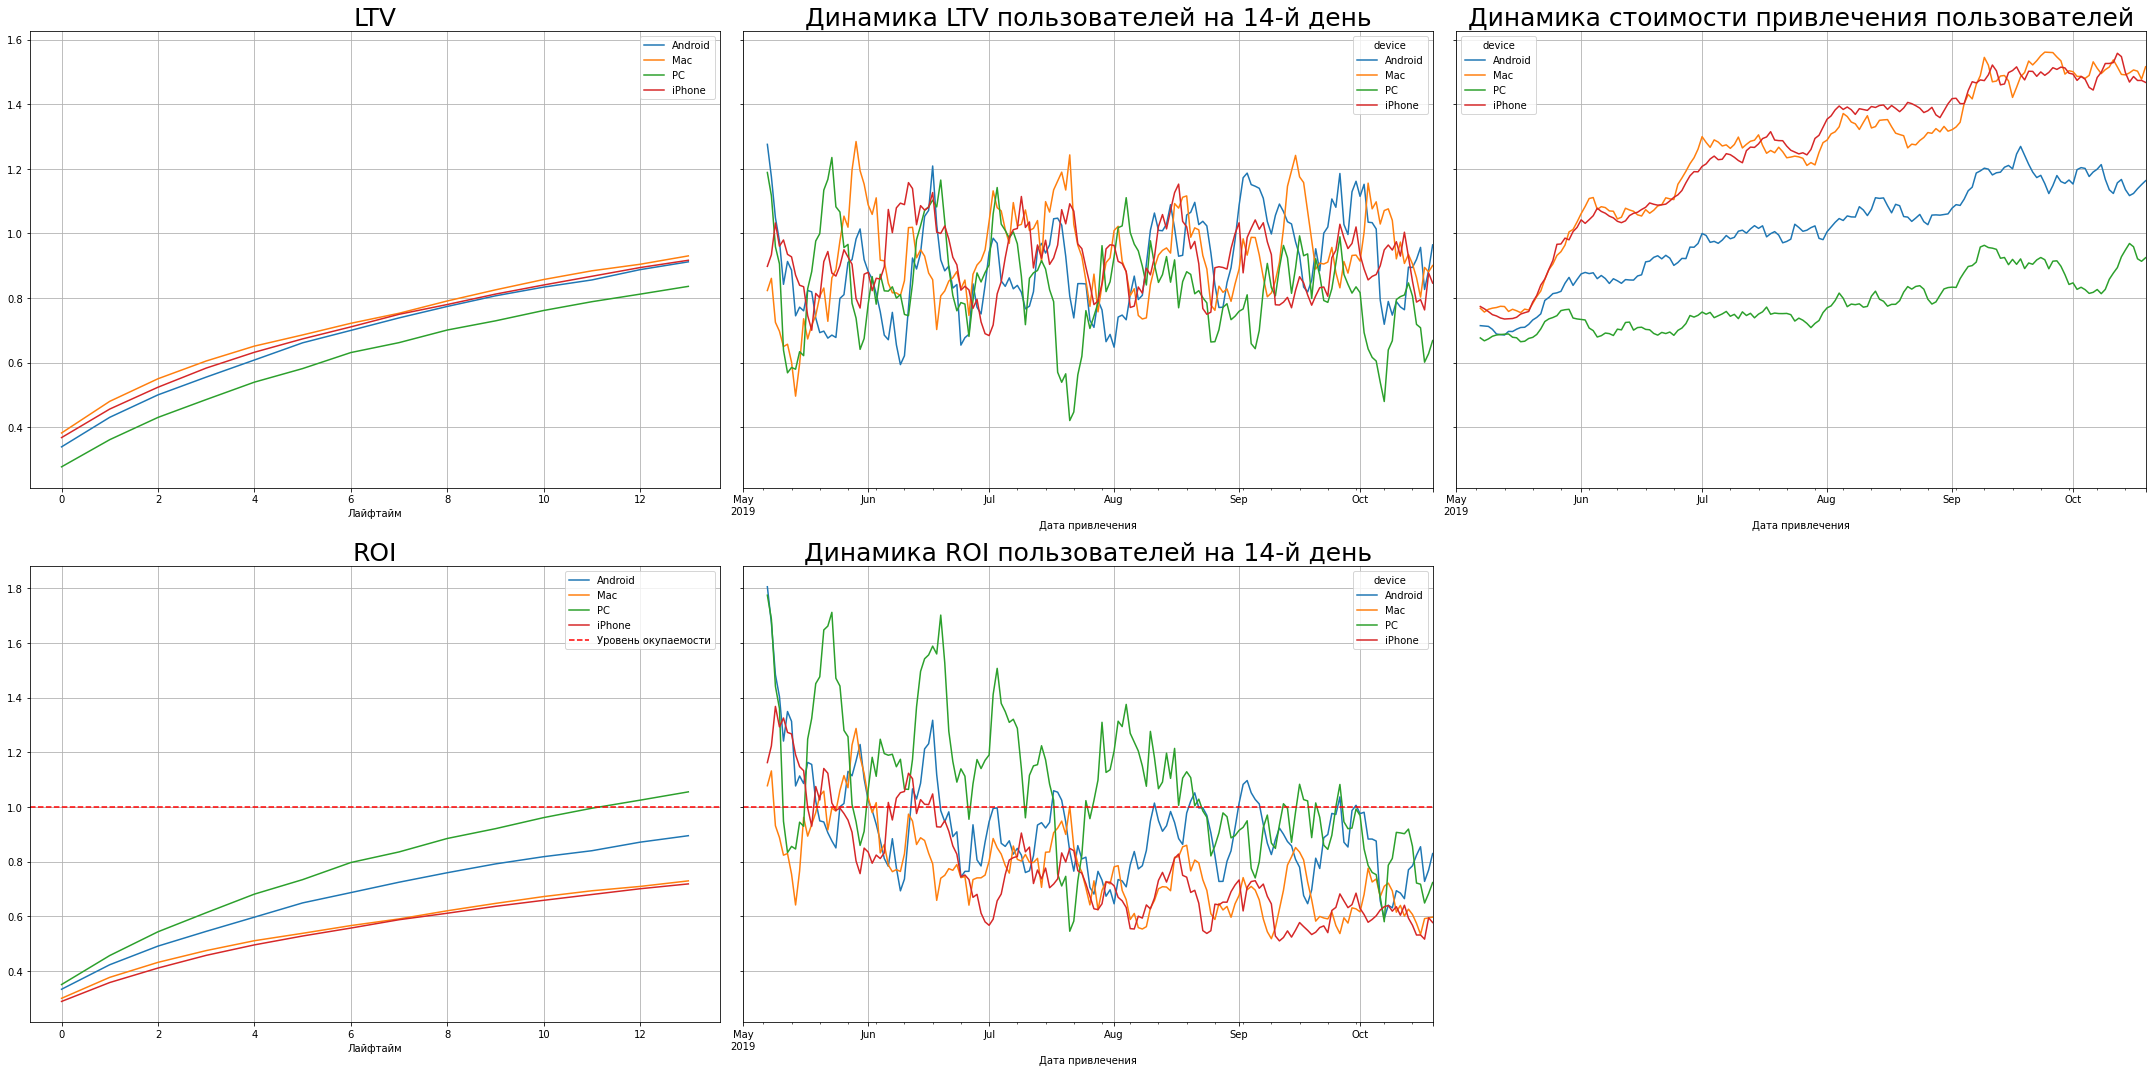

In [62]:
dimensions = ["device"]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

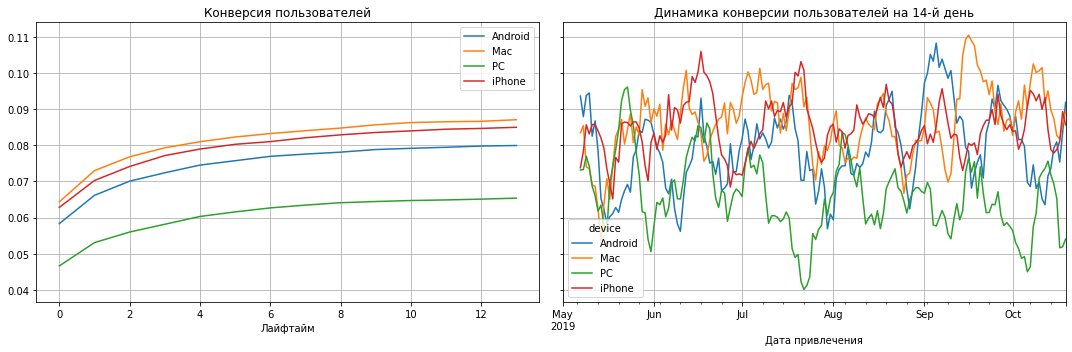

In [63]:
dimensions = ["device"]
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

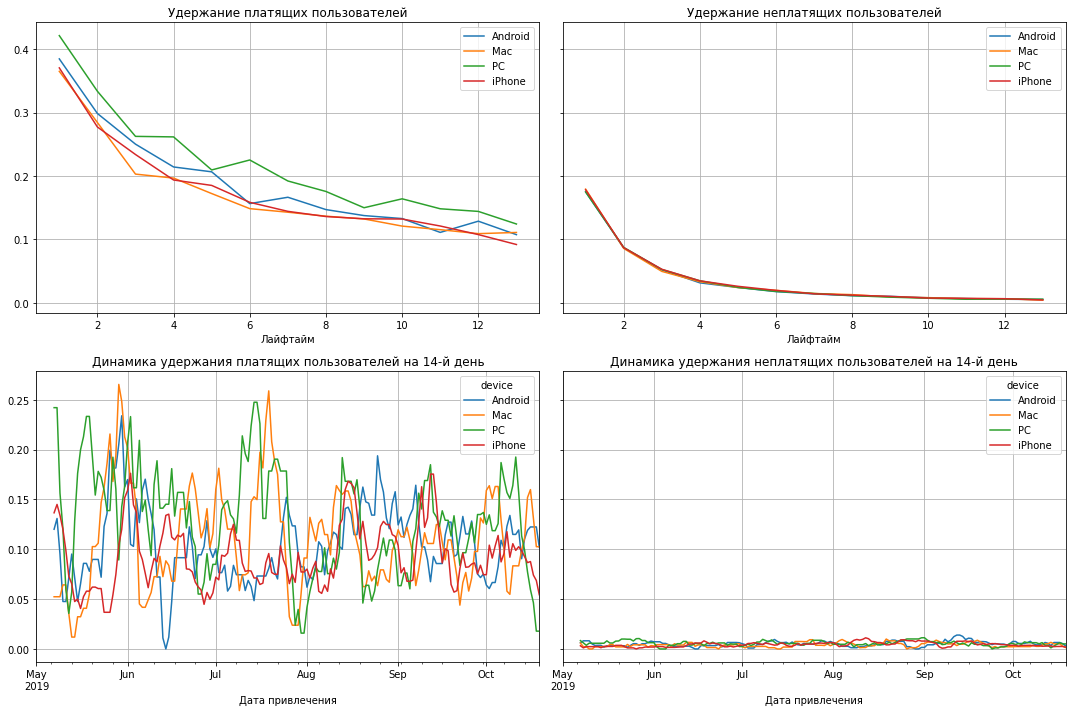

In [64]:
dimensions=["device"]
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

- В разбивке по устройствам видим, что ROI переходит в зону окупаемости на 11 день для устройтв на PC. Остальные устройства остаются в зоне не окупаемости. Динамика стоимости привлечения одного пользователя на РС самая низкая, в свою очередь стоимость привлечения одного пользователя на МАС и iphone - самая дорогая и ежемесячно растёт. 
- Что же, касается конверсии пользователей в платящих, то через PC самый низкий, причём глядя на динамику конверсии видно, что этот вариант является сезонозависимым, в середине лета, динамика конверсии снижается практически до нуля. Конверсия для пользователей МАС и iphone схожи и немного выше.
- Динамика удержания платящих пользователей немного выше, остальных пользователей.

Вопрос! Почему для пользователей  МАС и iphone растёт САС ежемесячно?

**5.5 Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

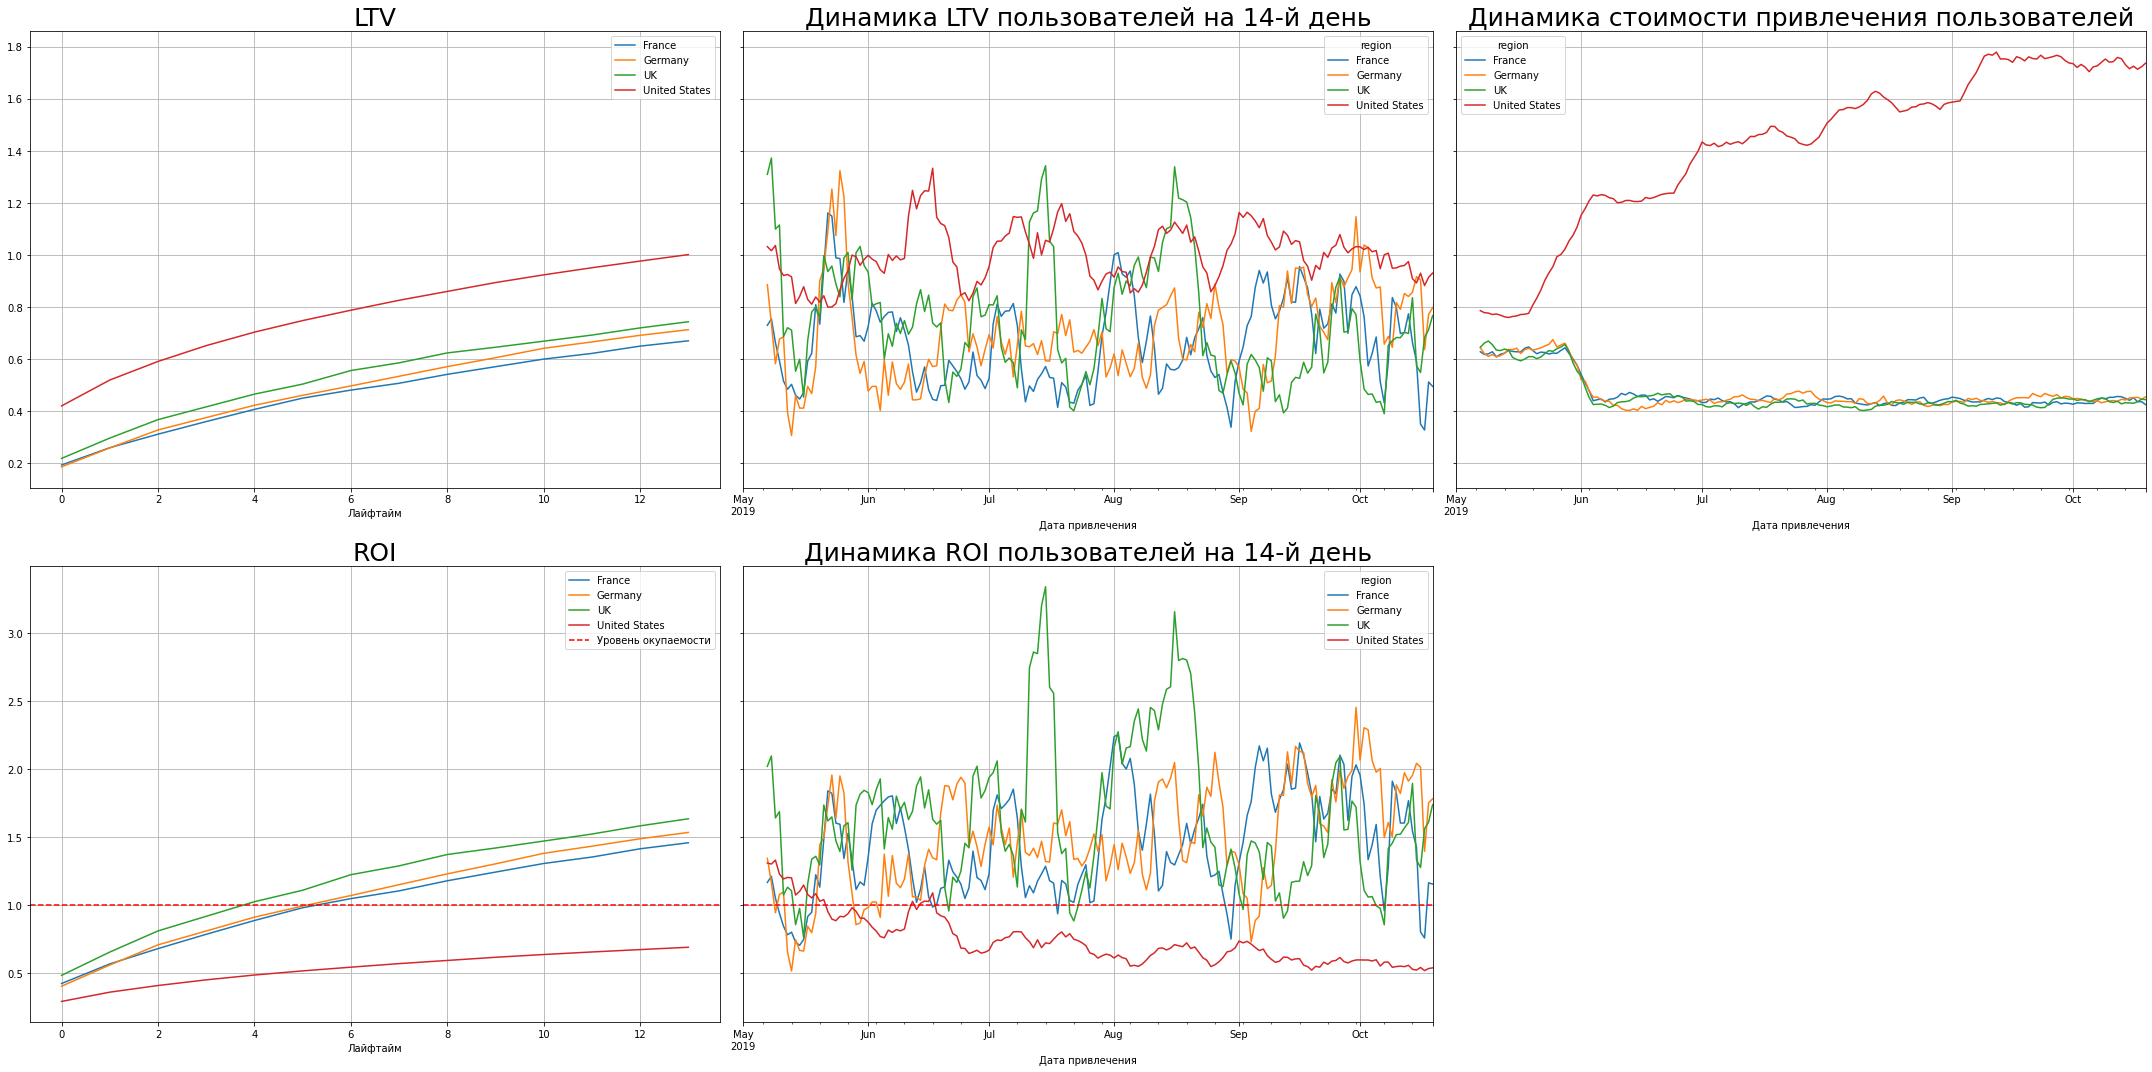

In [65]:
dimensions = ["region"]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

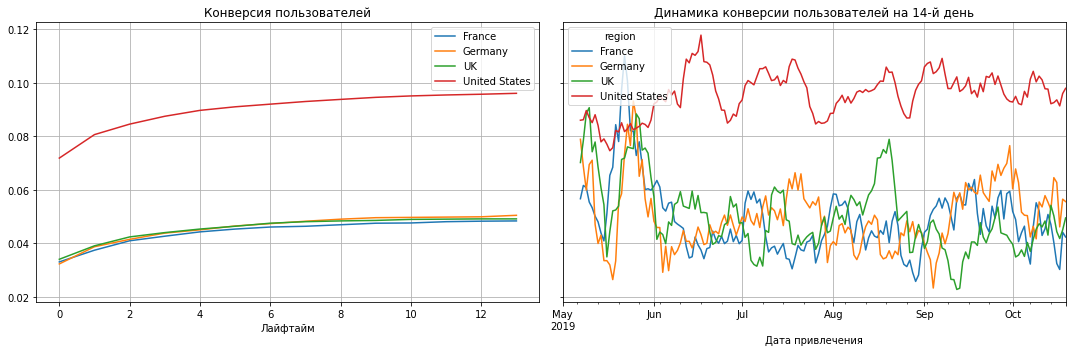

In [66]:
dimensions = ["region"]
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

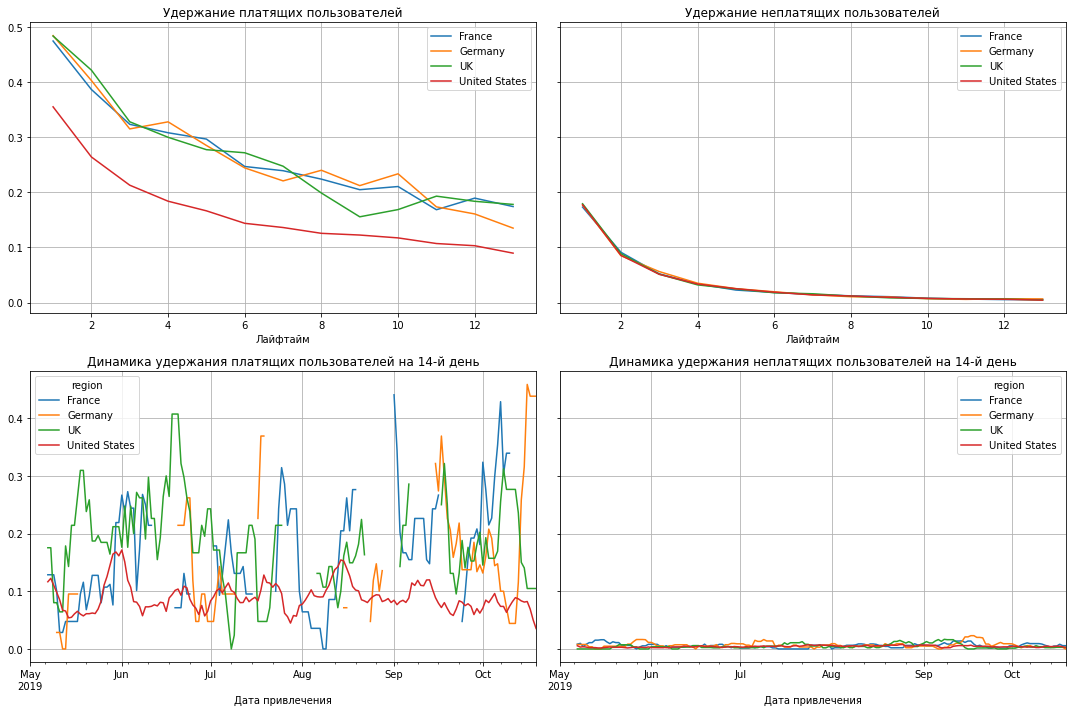

In [67]:
dimensions=["region"]
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

- В разбивке по странам пользователи из всех стран кроме США переходят в зону окупаемости уже на 4-5 день, в тоже время пользователи из США данный порог окупаемости так и не преодолевают. Глядя, на динамику стоимости привлечения одного пользователя видно, что затраты с каждым месяцем растут на 20-50%.
- По конверсии платящих пользователей США занимают с большим отрывом первое место, практически в 2 раза больше пользователей конвертируются в платящих.
- А вот удержание платящих пользователей, самое низкое. 

**5.6 Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

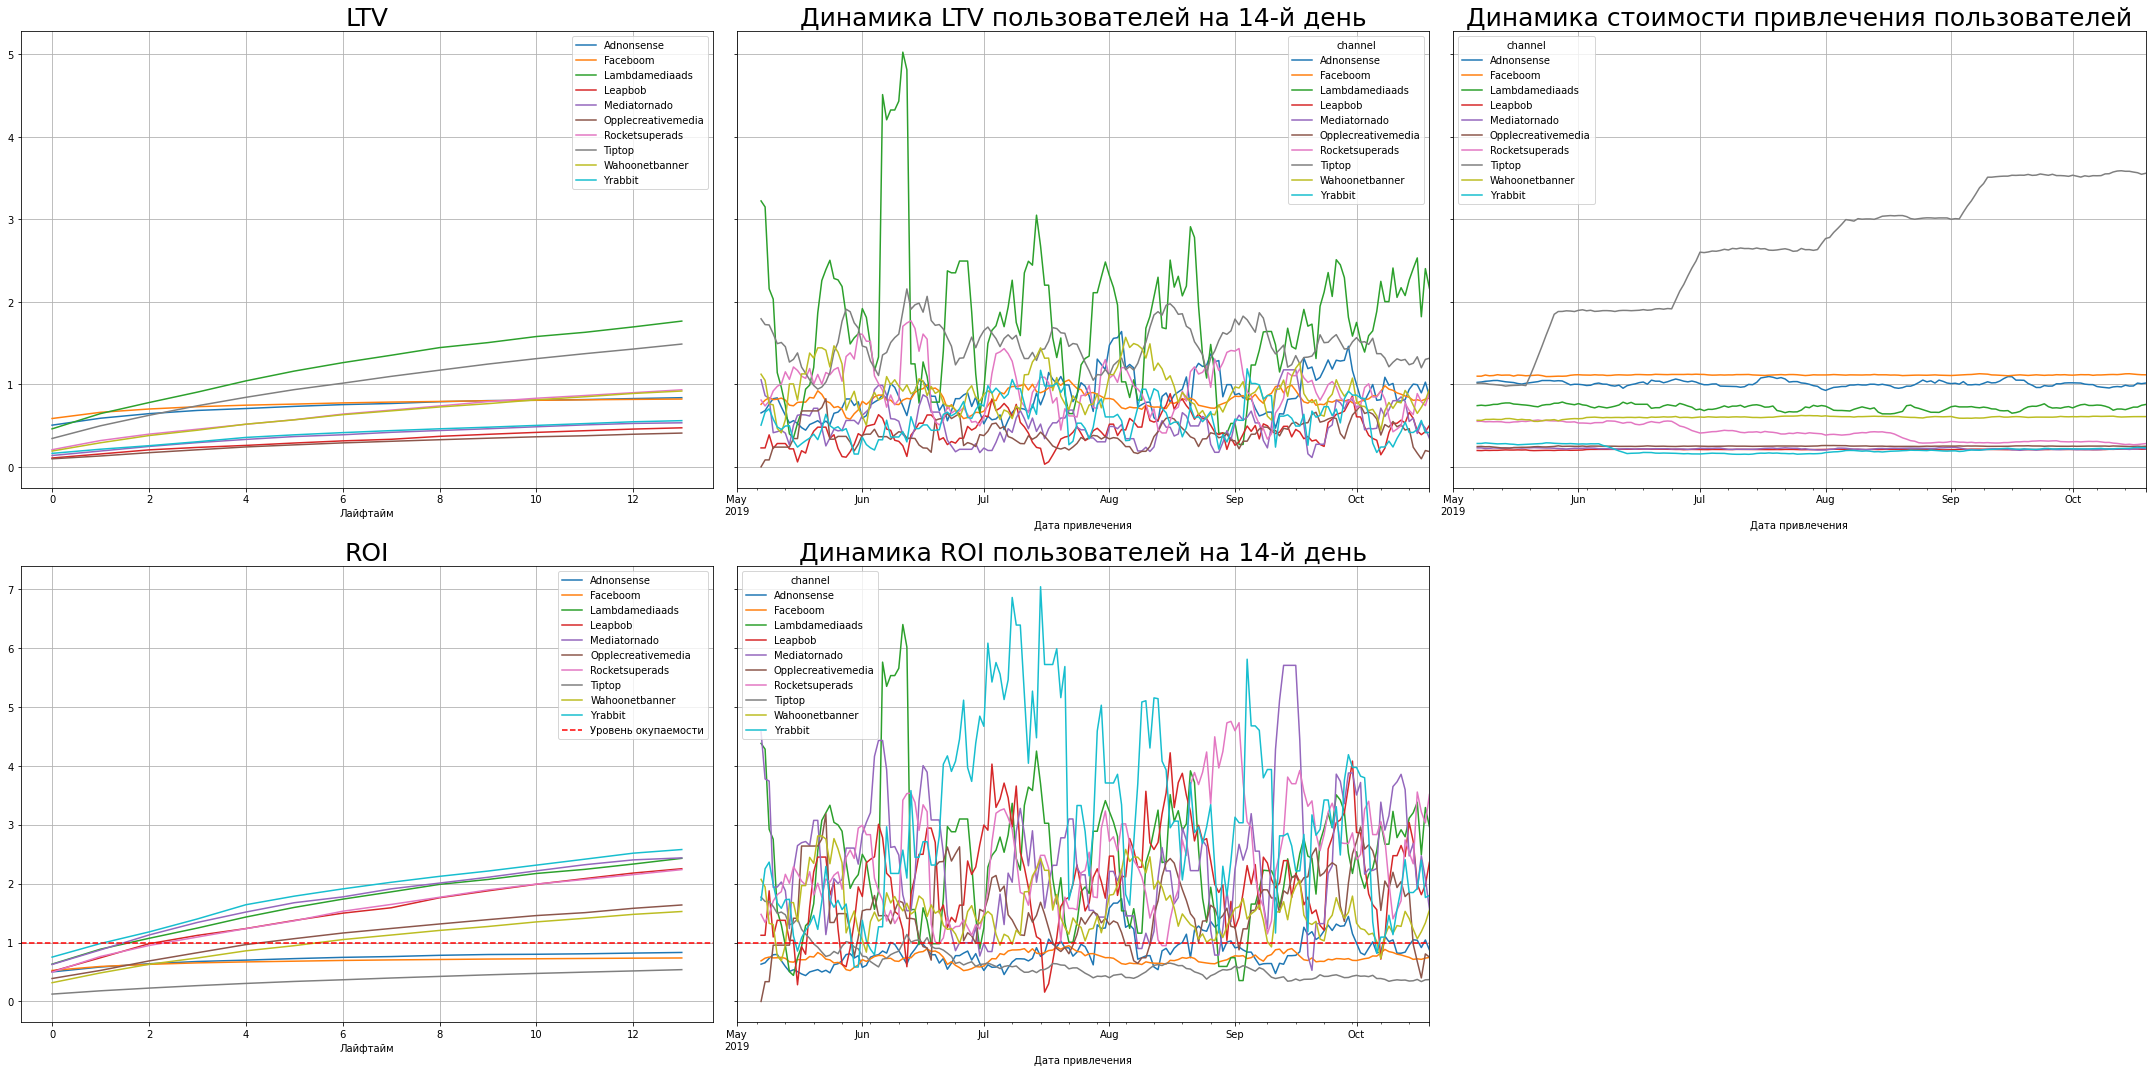

In [68]:
dimensions = ["channel"]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

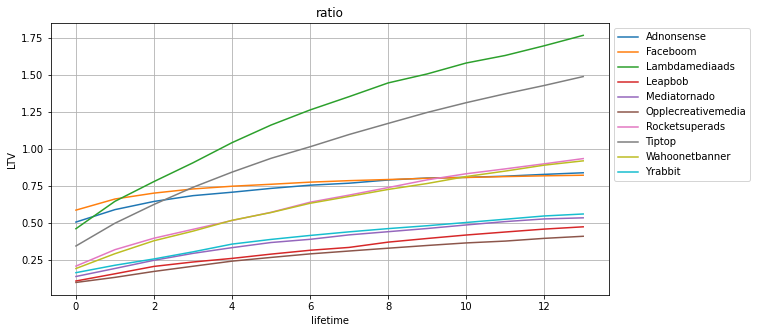

In [69]:
# Вывел график LTV отдельно
ltv_grouped.drop(columns=("cohort_size"))\
.T.plot(figsize=(10, 5), grid=True)
plt.title('ratio')
plt.xlabel('lifetime')
plt.ylabel('LTV')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

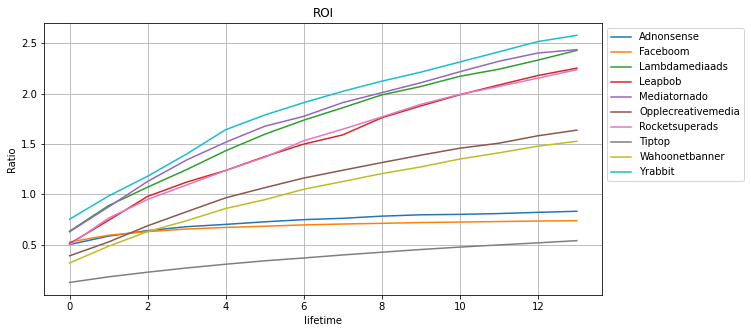

In [70]:
# Вывел график CAC отдельно
roi_grouped.drop(columns=(["cohort_size","cac"]))\
.T.plot(figsize=(10, 5), grid=True)
plt.title('ROI')
plt.xlabel('lifetime')
plt.ylabel('Ratio')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

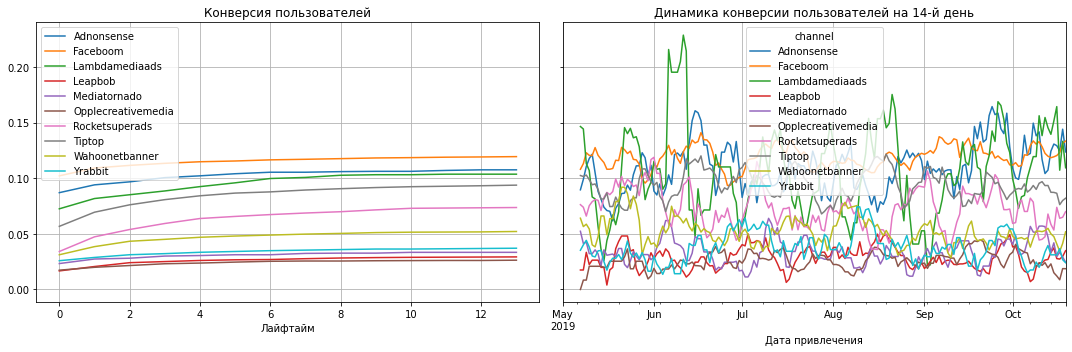

In [71]:
dimensions = ["channel"]
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

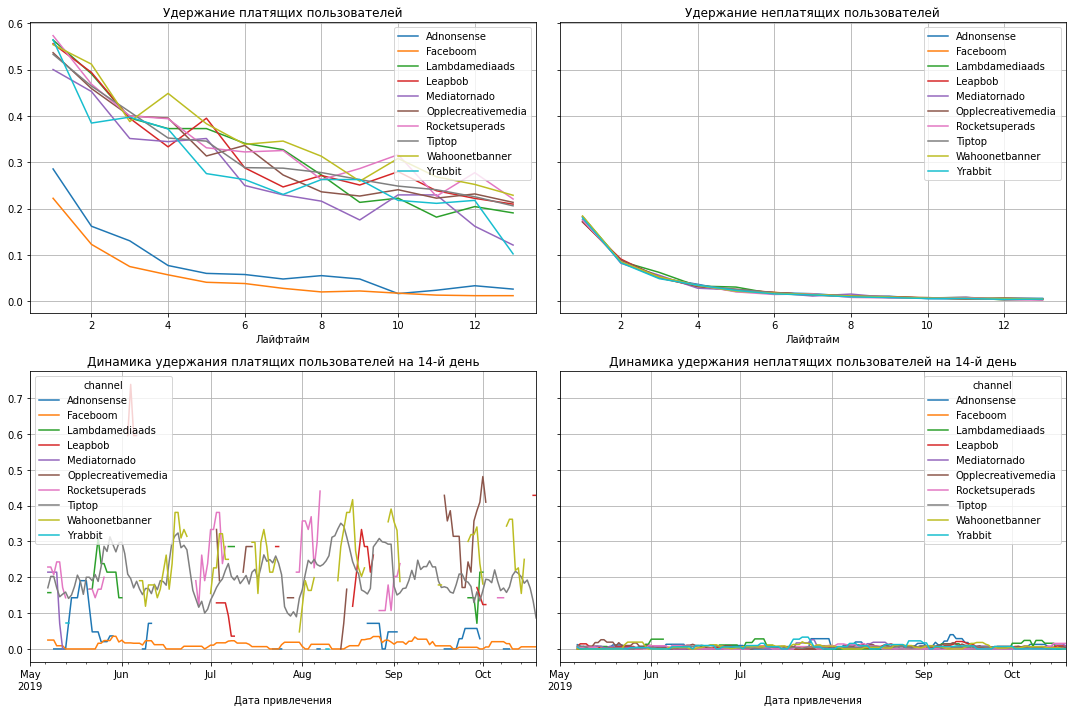

In [72]:
dimensions=["channel"]
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

- Практически все рекламные каналы для привлечения пользователей переходят в зону окупаемости в течении первой нелели. Три канала, которые не окупаются: 
    - Adnonsense
    - Faceboom
    - Tiptop

- Конверсия пользователей для каналов выше являются самыми высокими.

- А вот удерживать платящих пользователей пришедших через каналы  Adnonsense & Faceboom не получается.


**5.7 Окупается ли реклама, направленная на привлечение пользователей в целом?**

Рассматривая привлечение пользователей за исследуемый период не учитывая канал привлечения пользователей - "Organic" мы пришли к выводу, что реклама не окупается. На 14 день ROI составил 80%.

**5.8 Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

- Пользователи с устройствами PC показывают переход в зону окупаемости с 11 дня, остальные устройства окащывают негативное влияние на окупаемость рекламы, поскольку на 14 день находятся в зоне не окупаемости. Пользователи с устройствами - Android имеют 90% от окупаемости, а пользователи MAC or iphone на 14 день показывают 70%.

- Негативное влияние на окупаемость рекламы влияют пользователи из США, они не переходят в зону окупаемости в течении 14 дней.

- Три канала, которые не переходят в зону окупаемости за 14 дней являются: 
    - Adnonsense
    - Faceboom
    - Tiptop

**5.9 Чем могут быть вызваны проблемы окупаемости?**

- На мой взгляд проблема окупаемости связана с ростом стоиомсти привлечения пользователей. Данная аномалия для канала привлечения - Tiptop. 
- Низкое удержание платящих пользователей пришедщих с каналов: Adnonsense & Faceboom

**5.9.1 Распределение окупаемости в зависимости от региона и канала.**

In [73]:
profiles_channel_country = profiles.groupby(['region','channel'])\
    .agg({"user_id":"count","payer":["sum","mean"]})
profiles_channel_country
profiles_channel_country.columns = ["users","payers","ratio, %"]   
profiles_channel_country.sort_values(by=["region","ratio, %"],ascending=False).style.format({'ratio, %': '{:.2%}'})

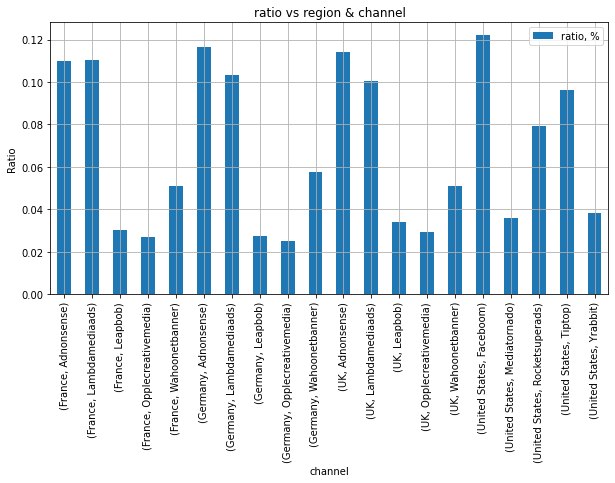

In [74]:
profiles_channel_country["ratio, %"].plot.bar(figsize=(10, 5), grid=True)
plt.title('ratio vs region & channel')
plt.xlabel('channel')
plt.ylabel('Ratio')
plt.legend()
plt.show()


Рассмотрев конверсию пользователей в зависимости от страны и канала привлечения, можем сделать вывод, что в остальных странах есть, как минимум два источника привлечения пользователей, где конверсия составляет около 10%. В США мы видим лишь один локомотив в виде - Faceboom. Также, можно отметить что канал привлечения - Adnonsense, является общим и передовым каналом для стран европейского союза. Напомню, что расходы на рекламу для этого канала сопостовима с стоимостью канала - Faceboom, но зато получается конвертировать по 10% пользователей в трёх странах. (Зато низкий коэффициент удержания)

сколько людей привлекает канал в разбивке по странам

In [75]:
profiles.groupby(['region'])\
    .agg({"user_id":"count","payer":["sum","mean"]})
profiles_channel_country
profiles_channel_country.columns = ["users","payers","ratio, %"]   
profiles_channel_country.sort_values(by=["region","ratio, %"],ascending=False).style.format({'ratio, %': '{:.2%}'})

Выходит, так что в США есть огромный рынок пользователей, конверсия этого рынка составляет почти 10%. Наряду с остальными странами с конверсией в 5% это кажется весомо, но за счёт того, что вложения в рекламу для канала привлечения - Tiptop, сравнительно высокие, имеем, что европейский рынок окупается да к тому же, очень быстро, буквально в первую неделю.

**5.9.2 Смотрим на американский рынок**

In [76]:
profiles1 = profiles.query('channel != "Organic" & region == "United States"')

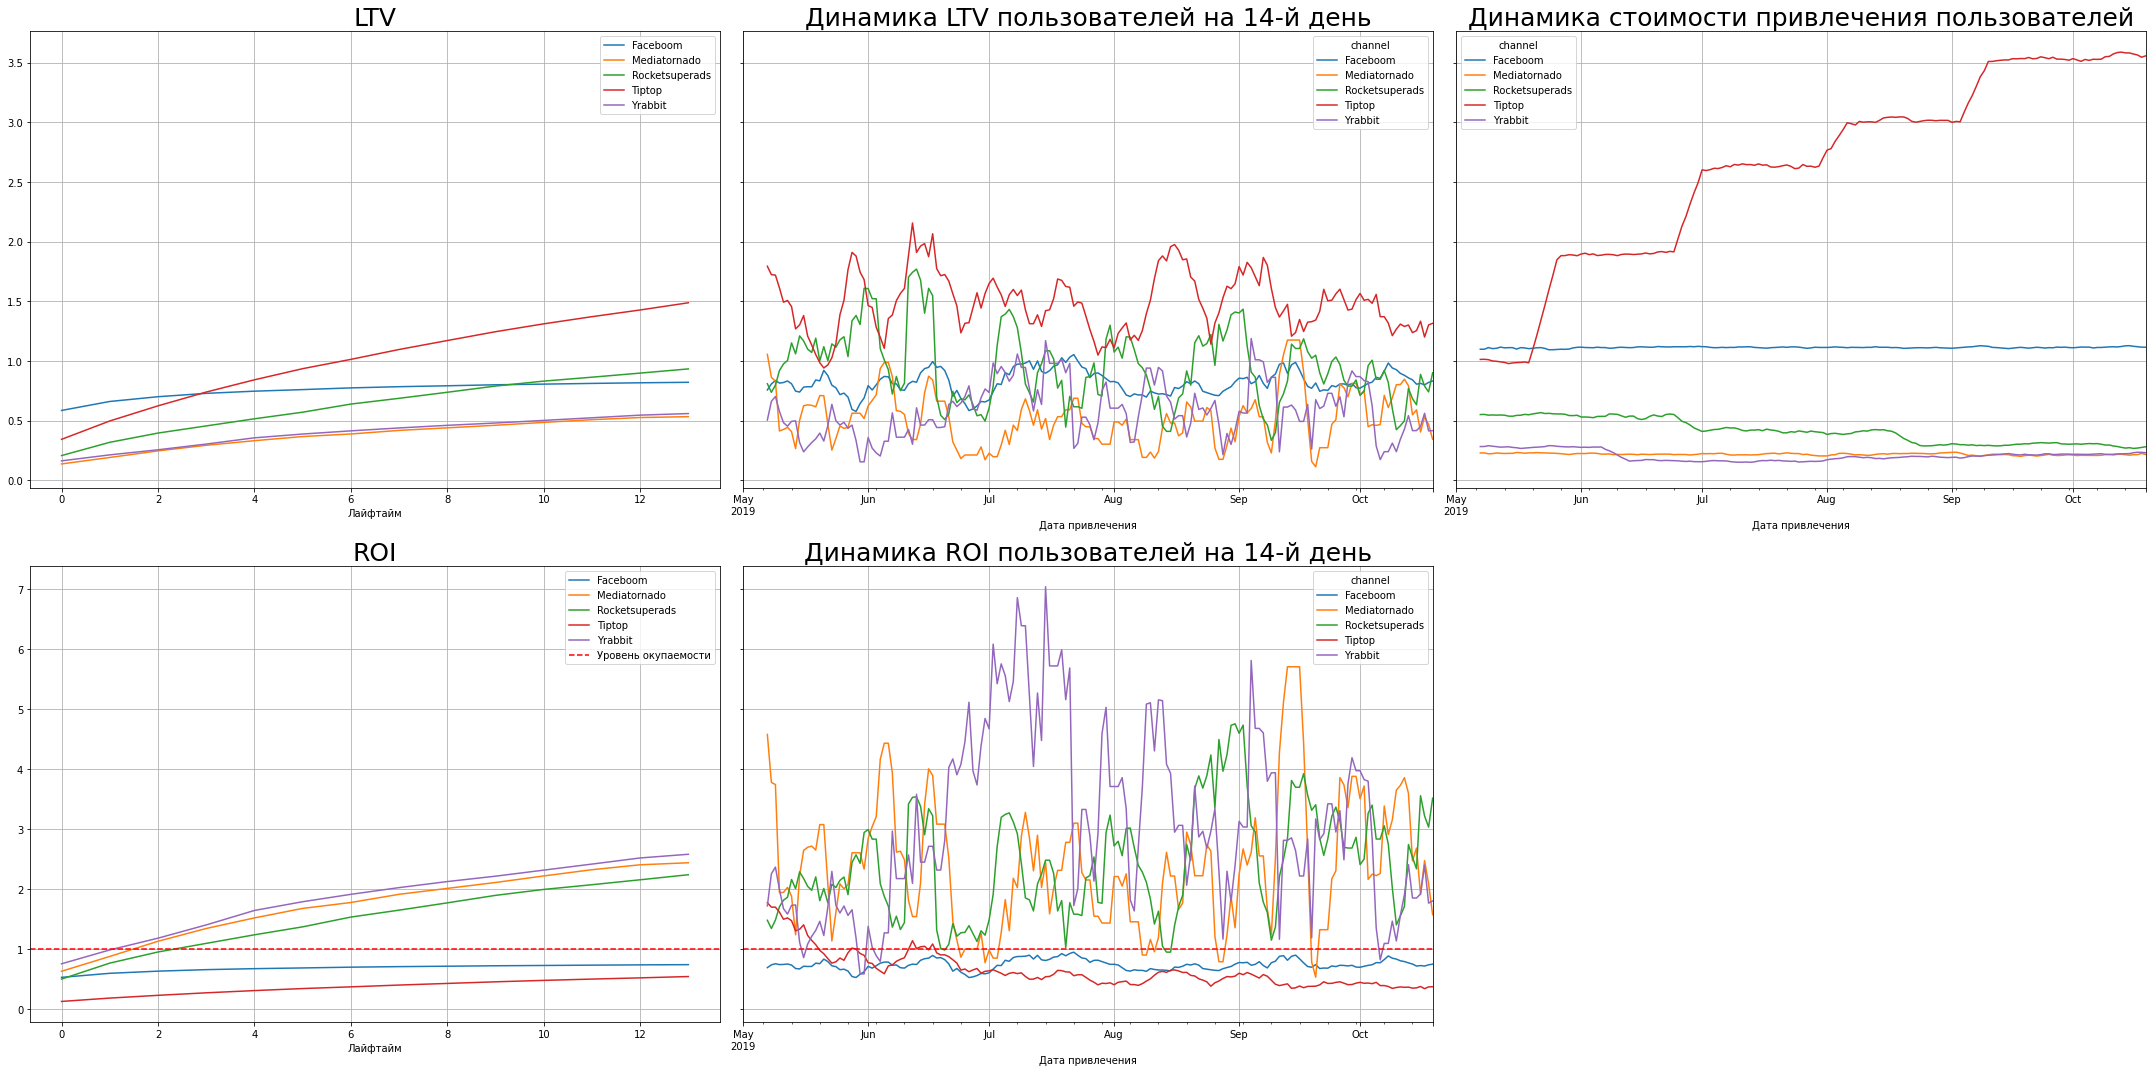

In [77]:
dimensions = ["channel"]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

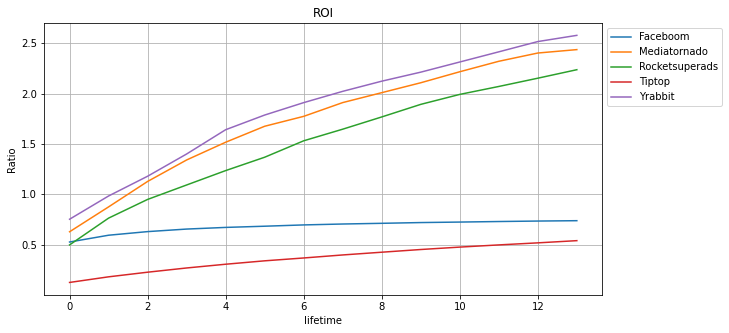

In [78]:
# Вывел график ROI отдельно
roi_grouped.drop(columns=(["cohort_size","cac"]))\
.T.plot(figsize=(10, 5), grid=True)
plt.title('ROI')
plt.xlabel('lifetime')
plt.ylabel('Ratio')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

In [79]:
profiles_channel_USA = profiles1.query('channel=="Yrabbit" | channel=="Rocketsuperads" | channel== "Mediatornado"')\
    .groupby(['region','channel'])\
    .agg({"user_id":"count","payer":["sum","mean"]})
profiles_channel_USA
profiles_channel_USA.columns = ["users","payers","ratio, %"]   
profiles_channel_USA.sort_values(by=["region","ratio, %"],ascending=False).style.format({'ratio, %': '{:.2%}'})

Доходными в США являются три канала, причём окупаемость их происходит очень быстро:
- Yrabbit
- Rocketsuperads
- Mediatornado
 Учитывая это, вычислим, что конверсия этих трёх каналов примерно составит - 5%. 

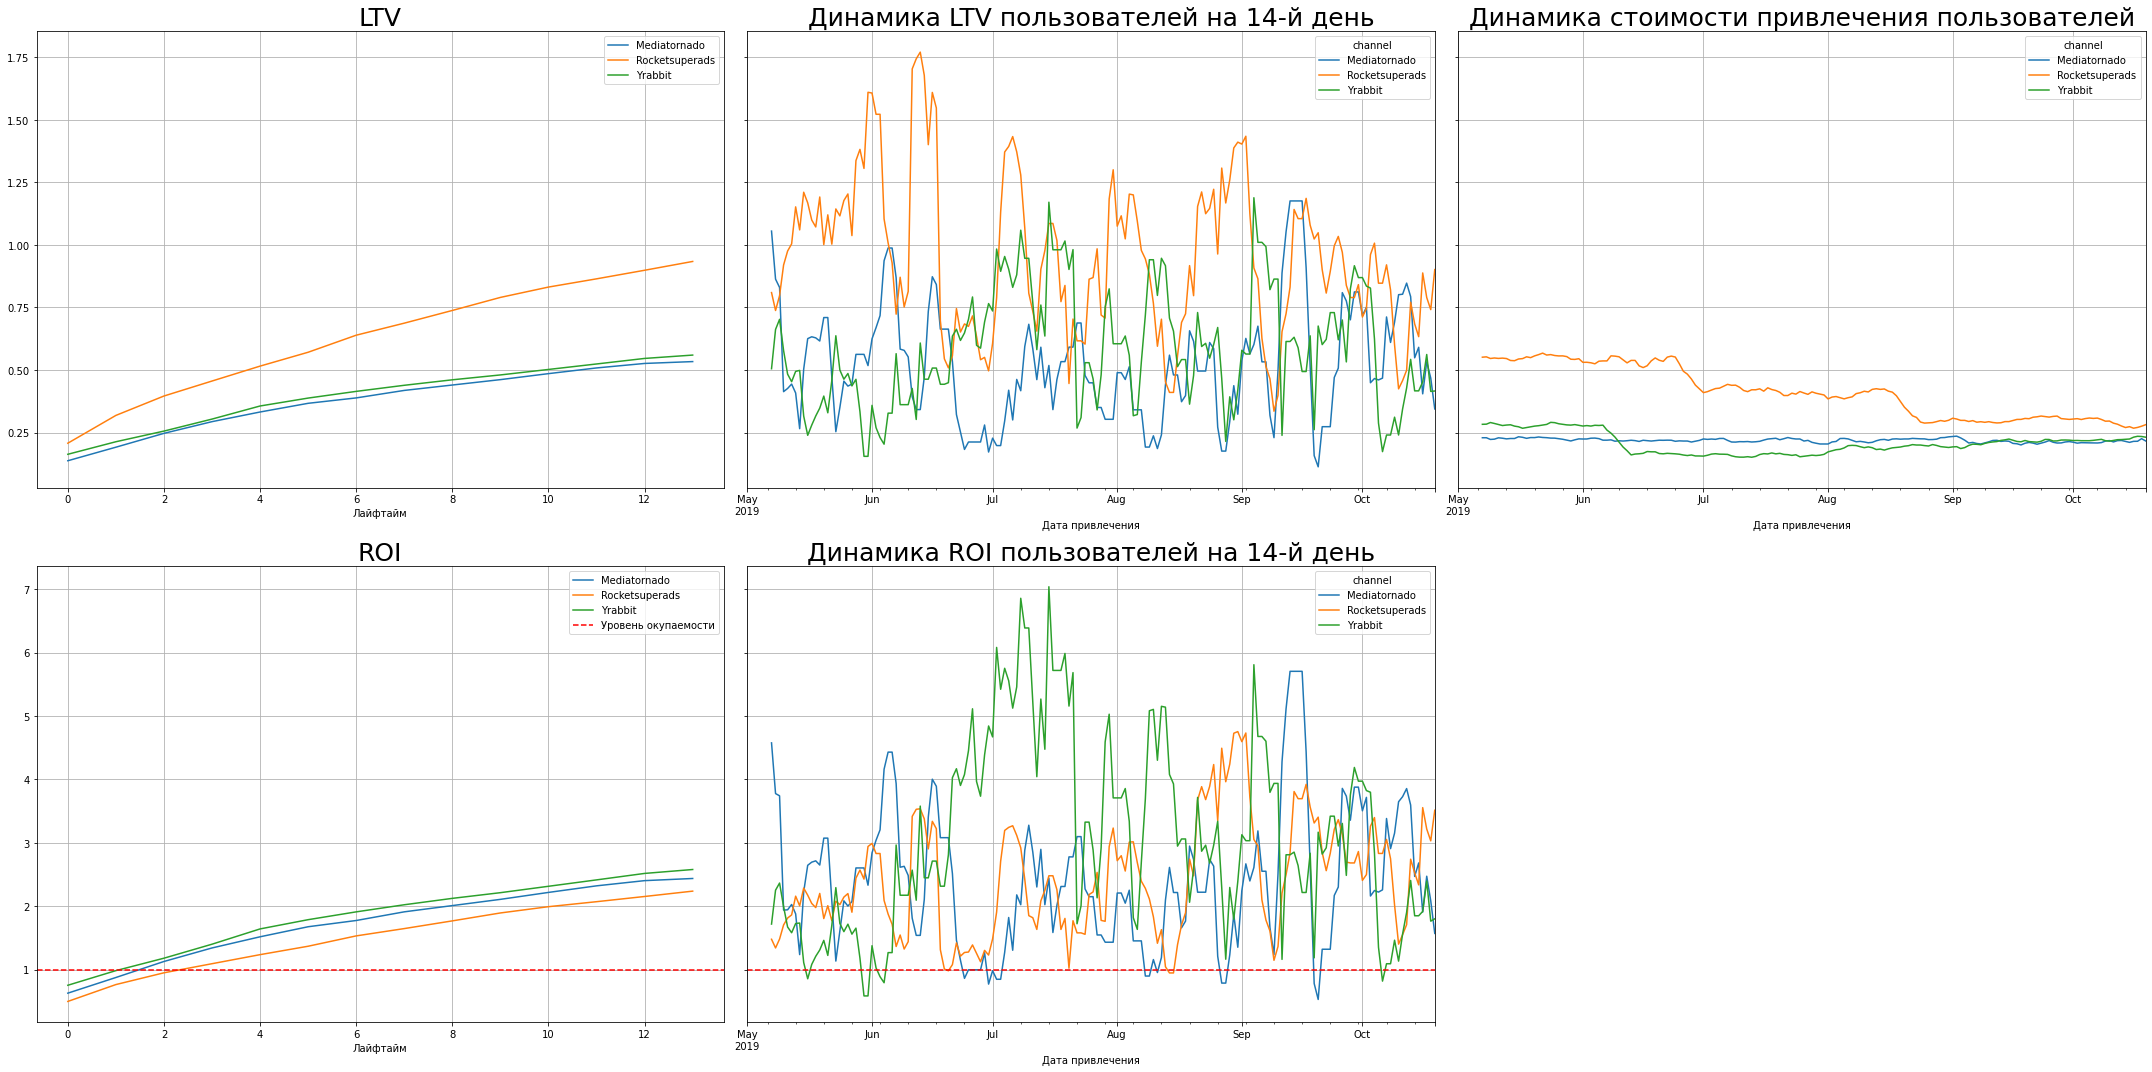

In [80]:
dimensions = ["channel"] # Фин показатели для наиболее перспективных каналов в США.
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1.query('channel=="Yrabbit" | channel=="Rocketsuperads" | channel== "Mediatornado"'), orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Чтобы реанимировать рынок США стоит перераспределить часть затрат с канала Tiptop на маркетинг для канала - Faceboom, чтобы увеличить удержание платящих пользователей, поскольку канал Faceboom отлично генерирует новых пользователей с лучшей конверсией.
Также стоит рассмотреть возможность финансмрования остальных каналов на рынке США. Несмотря на небольшую конверсию, эти каналы генерируют прибыль, окупаясь с первых дней.

**5.9.3 есть ли разница между окупаемостью устройств отдельно в США и отдельно в Европе (графики LTV, ROI, CAC с разбивкой по устройствам, отдельно для США и европейских стран). Это поможет понять, если ли проблема в устройствах.**

In [81]:
profiles2 = profiles.copy()

In [82]:
def countries(row):
    country = row["region"] 
    if country == "United States":
        return "USA"
    else:
        return "Europe union"
profiles2["count_gr"] = profiles2.apply(countries,axis=1)    

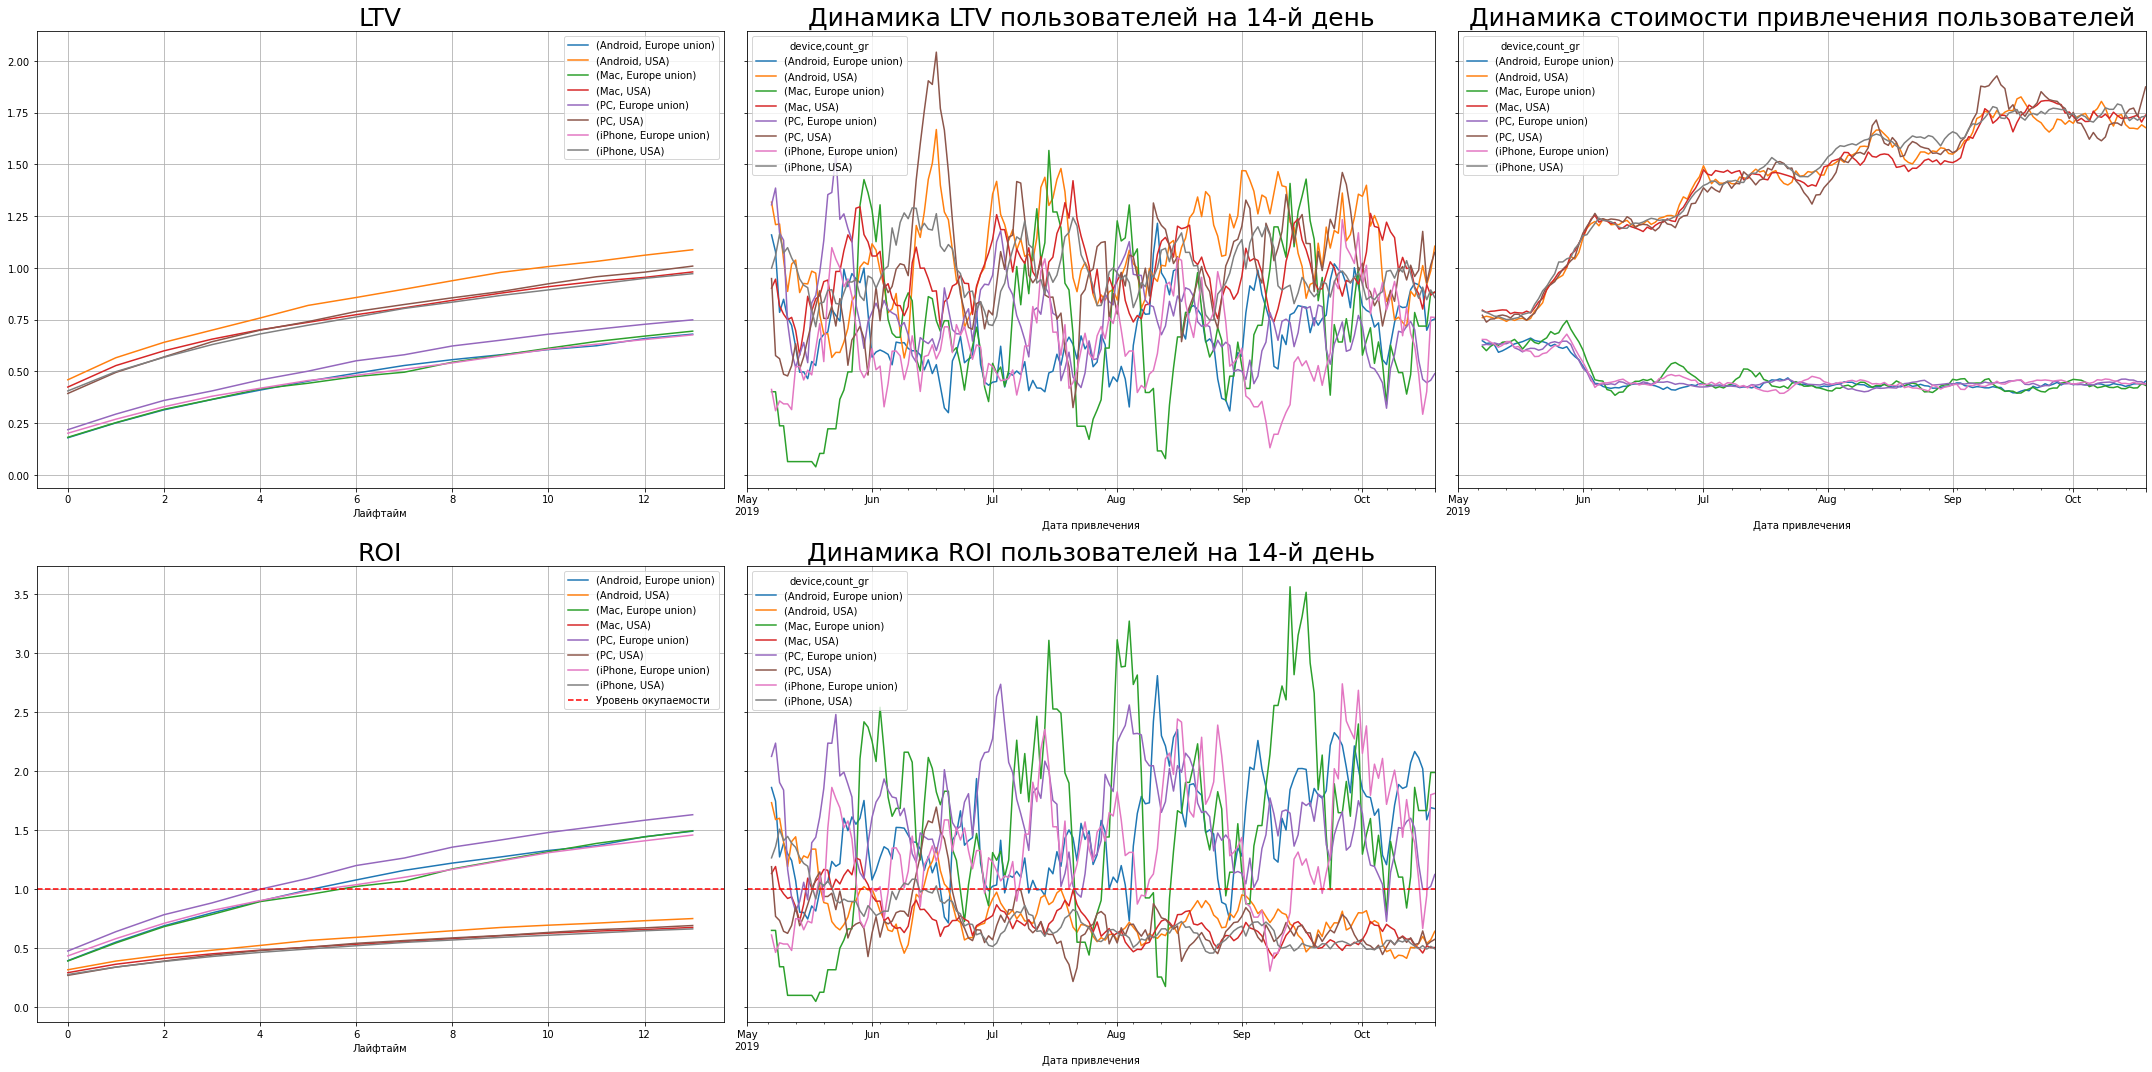

In [83]:
dimensions = ["device","count_gr"] # Определим окупаемость в зависимости от США или Европы и смотрим на устройства
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles2, orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

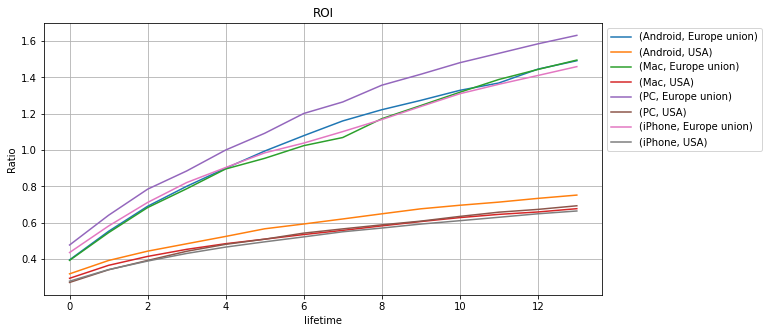

In [84]:
# Вывел график ROI отдельно
roi_grouped.drop(columns=(["cohort_size","cac"]))\
.T.plot(figsize=(10, 5), grid=True)
plt.title('ROI')
plt.xlabel('lifetime')
plt.ylabel('Ratio')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

Глядя на этот график, мы приходим к интересному выводу, что пользователи со всеми устройствами из Евросоюза окупились в течении первых двух недель. В свою очередь, пользователи в США вновь демонстрируют негативную динамику. Ярко выраженных проблем в устройствах - нет.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Предобработка данных**

В работе используем три датафрейма с данными:

- visits. Информация о пользователе, стране пользователя,тип устройства, канал перехода, дата и время начала сессии

- orders. Информация о пользователе, дата и время покупки, сумма заказа

- costs. Дата проведения рекламной акции, рекламный источник, расходы на эту компанию

В ходе предобработки данных выяснилось, что данные пропусков и явных дубликатов не имеют. Названия столбцов приведены к нижнему регистру, названия приведены к корректному виду. Тип данных в колонке с временем изменён на тип - datetime64.ns. В ДФ visits.channel данные столбцы приведены к одному виду.

**Исследовательский анализ данных**
Ознакомившись с данными, можем подытожить что работаем с данными компании запустившего развлекательное приложение Procrastinate Pro+. Данные собраны от пользователей, которые пребывают на территориях стран: США, Великобритания, Франция и Германия. Наиболее платежеспособными пользователями считаются пользователи из США. Также стоит обратить внимание, что общее число пользователей из США в два раза больше, чем суммарное количество остальных пользователей. А также конверсия для пользователей из США является больше, 6 % платящих пользователей (Число платящих пользователей к общему числу пользователей).

Большинство пользователей пользуются приложением на MAC и на смартфоне - iphone c операционной системой IOS. Впринципе, для всех пользователей в зависимости от девайса, конверсия примерно около 5-6%

Наибольшее число платящих пользователей пришли с канала - "Faceboom". Конверсия в 12%! Стоит обратить внимание на канал - "Organic". Это пользователи, которые привлечены не через рекламные каналы. 


**Маркетинг**
Рекламный бюджет за период для приложения Procrastinate Pro+ составил 105497.0 У.Е. Львиная доля бюджета потрачена для привлечения пользователей из рекламного источника - Tiptop. Следом идёт Faceboom c затратами в 30% от общего бюджета.

Наиболее неэффективно выглядит продвижение рекламы через источник Tiptop. За данный период компания вложила 50% своего рекламного бюджета, для получения конверсии 9,6%, САС на одного пользователя составил в среднем 2.79 У.Е. на Faceboom в свою очередь – 1.11 У.Е. Стоит разобраться, почему при увеличивании финансирования количество платящих пользователей не росло пропорционально.

**Оцените окупаемость рекламы**

Помним, что для канала - 'Organic', компания не затрачивает средства для привлечения клиентов. На мой взгляд стоит исключить этот канал для расчёта, чтобы точнее взглянуть на ситуацию, где компания тратит средства.
Анализируя данные, выяснили:
- LTV - общая выручка на текущий день / размер когорты.  Наблюдается стабильный рост, качество платящих пользователей не падает. 
- САС - стоимость привлечения одного пользователя растёт с каждым месяцем. 
- ROI - отношение LTV к CAC на 14 день уже не приближается к окупаемости, то есть ROI не окупается. На 14 день значение составляет около 80 процентов.

- В разбивке по устройствам видим, что ROI переходит в зону окупаемости на 11 день для устройтв на PC. Остальные устройства остаются в зоне не окупаемости. Динамика стоимости привлечения одного пользователя на РС самая низкая, в свою очередь стоимость привлечения одного пользователя на МАС и iphone - самая дорогая и ежемесячно растёт. 
- Что же, касается конверсии пользователей в платящих, то через PC самый низкий, причём глядя на динамику конверсии видно, что этот вариант является сезонозависимым, в середине лета, динамика конверсии снижается практически до нуля. Конверсия для пользователей МАС и iphone схожи и немного выше.
- Динамика удержания платящих пользователей на устройствах РС немного выше, остальных пользователей.

- В разбивке по странам пользователи из всех стран кроме США переходят в зону окупаемости уже на 4-5 день, в тоже время пользователи из США данный порог окупаемости так и не преодолевают. Глядя, на динамику стоимости привлечения одного пользователя видно, что затраты с каждым месяцем растут на 20-50%.
- По конверсии платящих пользователей США занимают с большим отрывом первое место, практически в 2 раза больше пользователей конвертируются в платящих.
- А вот удержание платящих пользователей, самое низкое.

- Практически все рекламные каналы для привлечения пользователей переходят в зону окупаемости в течении первой нелели. Три канала, которые не окупаются: 
    - Adnonsense
    - Faceboom
    - Tiptop

- Конверсия пользователей для каналов выше являются самыми высокими.
- А вот удерживать платящих пользователей пришедших через каналы  Adnonsense & Faceboom не получается.





**Рекомендации для отдела маргетинга:**

- В ходе анализа было установлено, что наиболее перспективным каналом за данный перид исследования оказался канал - Lambdamediaads. Представлен в трёх странах Европы, высокая конверсия, окупаемость в течении нескольких дней.
- Стоит проверить рекламную акцию для каналов: Adnonsense & Faceboom. Ведь конверсия из этих источников, достаточно, высокая, а вот удержание платящих пользователей очень низкая. Возможно, это связано с некоторым несоответствием рекламного слогана и реальностью.

- Обратить внимание на ежемесячный рост расходов на привлечение одного пользователя с канала - Tiptop

- Также стоит попробовать пользователей из канала - "Organic" конвертировать в платящих пользователей. Для этого стоит рассмотреть промоакции для новых пользователей, программу скидок и прочее.
 

In [85]:
profiles3 = profiles2.query('channel != "Organic" & count_gr == "Europe union"')

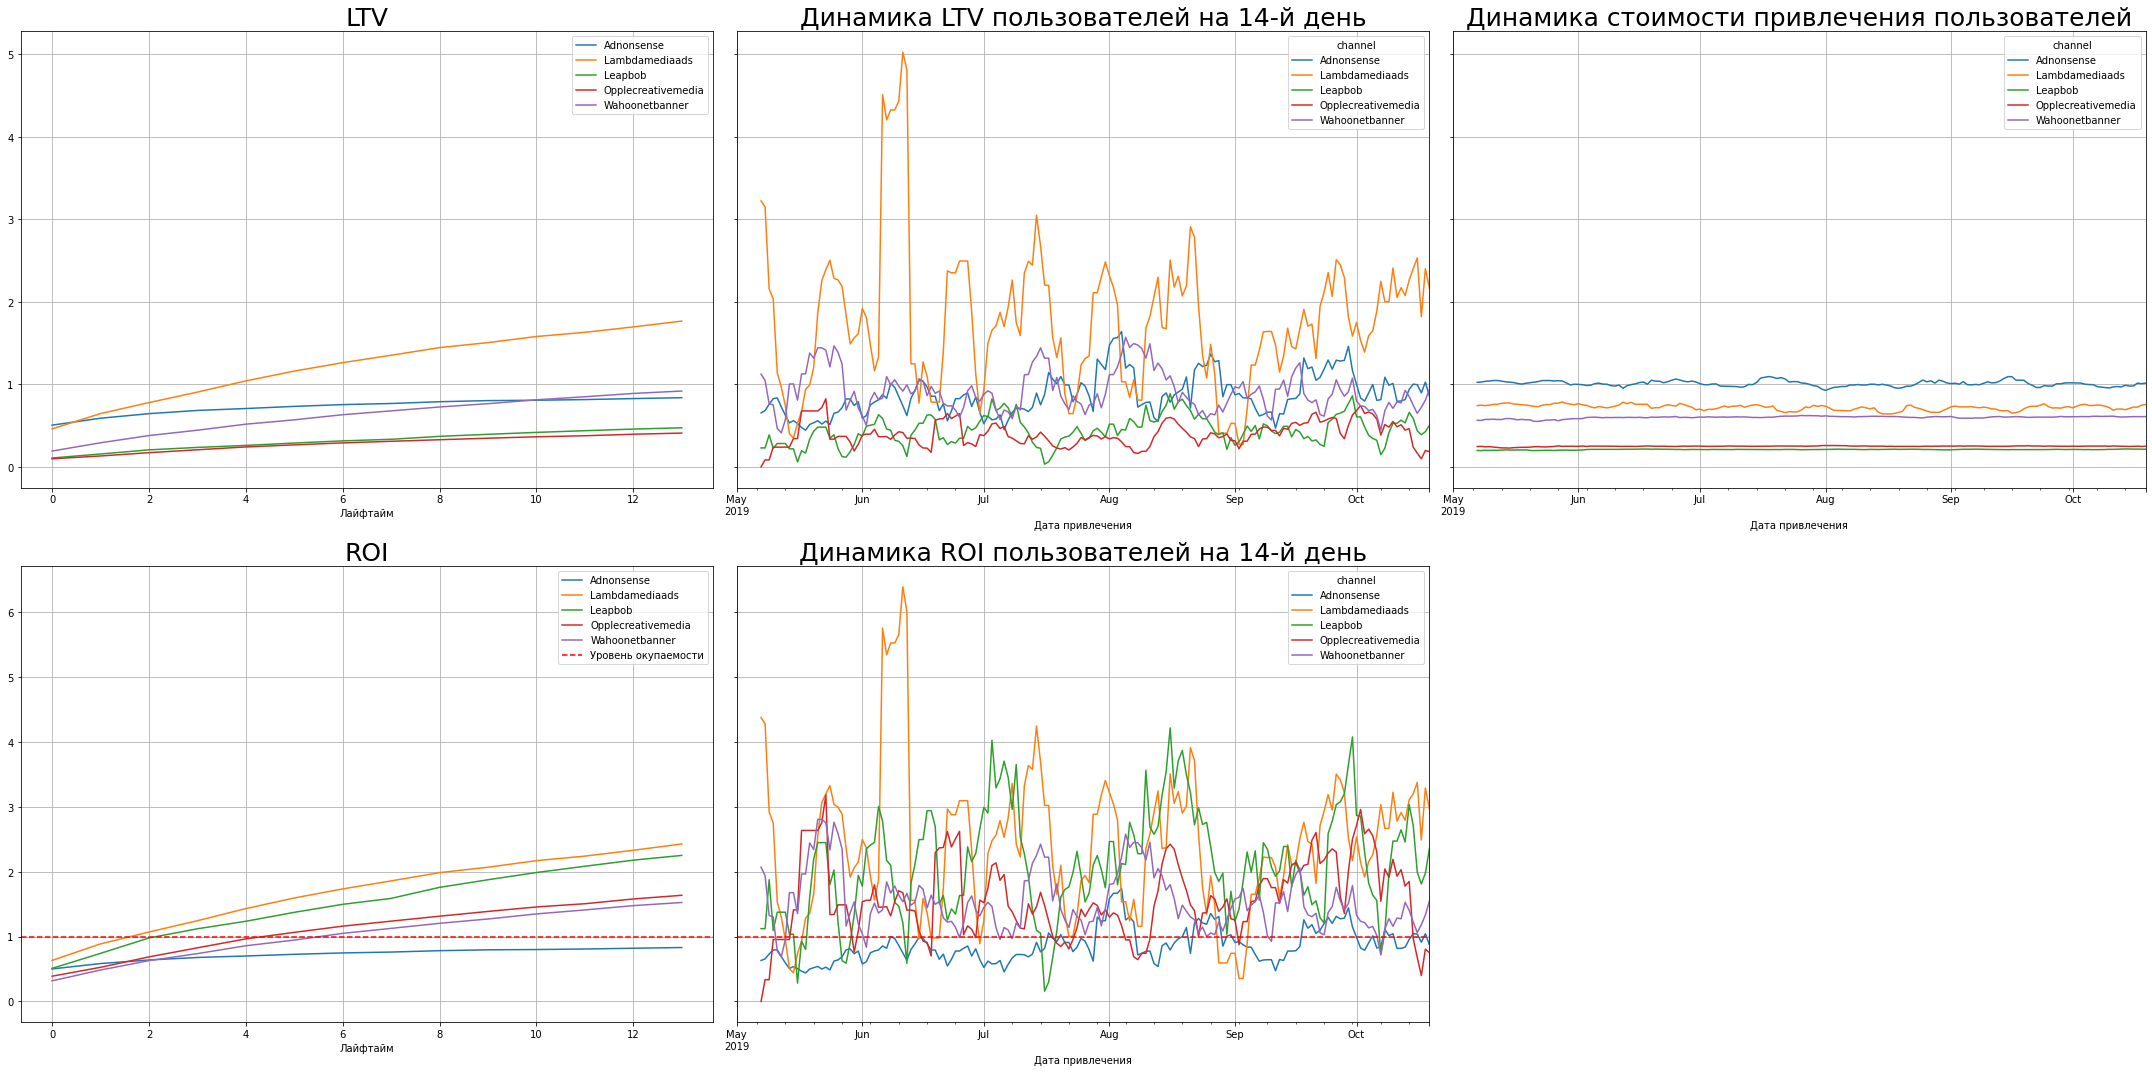

In [86]:
dimensions = ["channel"]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles3, orders, observation_date, horizon_days,dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Соглашусь с тем, что пенаправить просто денежные потоки с одного канала на другой, не хорошая затея. У нас есть более перспективные каналы для развития бизнеса с учётом показателей. Например, мы выяснили, что на европейском рынке существует, как минимум два источника привлечения пользователей, где конверсия составляет около 10%. Также, можно отметить что канал привлечения - Adnonsense, является общим и передовым каналом для стран европейского союза. Напомню, что расходы на рекламу для этого канала сопостовима с стоимостью канала - Faceboom, но зато получается конвертировать по 10% пользователей в трёх странах. Правда, этот канал требует дополнительной доработки, поскольку страдает темже недугом, как  и Faceboom с симптомами низкого удержания платящих пользователей. Также к перспективному каналу европейского рынка относится с высокой конверсией и хорошей окупаемостью:
- Lambdamediaads


Подводя итог, можно сказать, что крупные каналы по привличению пользователей не оправдали надежду отдела маркетинга. Данные каналы генерируют огромное число потенциальных платящих пользователей, хорошую конверсию, но в итоге за период иследования средства затраченные на маркетинг для привлечения одного пользователя не окупились. С другой стороны пользователи пришедшие через более мелкие площадки конвертировались и удерживались намного лучше, при этом генерируя прибыль. Хочется особенно выделить канал - Lambdamediaads.